# Module 1: Introduction & Concept Learning
**Course:** Arivu AI Machine Learning Course  
**Duration:** 4-6 hours  
**Prerequisites:** Basic Python programming, understanding of basic mathematics

---

## 🎯 Learning Objectives

By the end of this module, you will be able to:

1. **Define** well-posed learning problems with task, performance, and experience
2. **Design** the four key components of any learning system
3. **Explain** concept learning as a search through hypothesis space
4. **Apply** the Find-S algorithm to find maximally specific hypotheses
5. **Implement** the Candidate-Elimination algorithm using version spaces
6. **Analyze** the role of inductive bias in learning

---

## 💡 Why This Matters - The $2 Million Question

### Real-World Impact

**Think About This:**
- Netflix recommends shows you'll love—how does it know?
- Gmail blocks spam emails automatically—who taught it?
- Self-driving cars recognize pedestrians—but never took a driving lesson

**The Business Impact:**
- Companies lose $62 billion annually due to poor customer understanding
- Machine Learning reduces fraud detection costs by 40%
- Personalization engines increase revenue by 15-20%

**The Challenge:** Can we teach computers to improve from experience without explicitly programming every scenario?

### Personal Experience Story

**Project:** Email Spam Filter for Enterprise Client  
**Challenge:** Company was losing 2 hours per employee per week to spam emails (500 employees = 1,000 hours/week wasted)  
**Solution:** Implemented a machine learning-based spam filter using concept learning principles  
**Impact:**
- Reduced spam by 98.5%
- Saved approximately $1.2M annually in productivity
- False positive rate < 0.1% (critical for business emails)

This module teaches you the **fundamental concepts** that power such systems!

---

## 📦 Setup & Dependencies

Let's start by importing the necessary libraries and setting up our environment.

In [1]:
# Import required libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import List, Dict, Tuple, Set
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All libraries imported successfully!")
print(f"📊 NumPy version: {np.__version__}")
print(f"📊 Pandas version: {pd.__version__}")
print(f"📊 Matplotlib version: {plt.matplotlib.__version__}")

✅ All libraries imported successfully!
📊 NumPy version: 2.2.6
📊 Pandas version: 2.3.2
📊 Matplotlib version: 3.9.0


## 🔧 Helper Functions

Let's define some utility functions we'll use throughout this notebook.

In [8]:
from pathlib import Path
import json
import pandas as pd

from pathlib import Path
import json

def load_json_data(file_path: str = None) -> dict:
    """
    Load JSON data from a user-specified path.

    Args:
        file_path: Optional path to the dataset file. If None, user will be prompted.

    Returns:
        Dictionary containing the loaded data.
    """
    # If no file path provided, ask the user to provide it
    if file_path is None:
        file_path = input("📂 Enter the full path to your dataset : ").strip()

    # Convert to Path object for cross-platform compatibility
    data_path = Path(file_path)

    # Check if the file exists
    if not data_path.exists():
        raise FileNotFoundError(f"❌ The file '{file_path}' was not found. Please check the path and try again.")

    # Load and return JSON data
    with open(data_path, 'r') as f:
        return json.load(f)

def print_section_header(title: str, emoji: str = "📚"):
    """
    Print a formatted section header.

    Args:
        title: Section title
        emoji: Emoji to display
    """
    print("\n" + "="*80)
    print(f"{emoji} {title}")
    print("="*80 + "\n")


def visualize_hypothesis(hypothesis: list, attribute_names: list, title: str = "Hypothesis"):
    """
    Visualize a hypothesis as a formatted table.

    Args:
        hypothesis: List representing the hypothesis
        attribute_names: Names of attributes
        title: Title for the visualization
    """
    df = pd.DataFrame([hypothesis], columns=attribute_names)
    print(f"\n{title}:")
    print(df.to_string(index=False))
    print()

print("✅ Helper functions defined successfully!")


✅ Helper functions defined successfully!


---

# Part 1: Understanding Machine Learning Fundamentals

## 🧠 Slide 2: Learning Like Humans Do

### The Human Learning Process

Let's understand how humans learn by solving a simple equation, and then see how this parallels machine learning!

**Problem:** Solve 2x + 3 = 9

**Human Approach:**
1. **Trial 1:** Try x = 2 → Result: 2(2) + 3 = 7 → Error: Off by 2 → Learning: "x needs to be bigger"
2. **Trial 2:** Try x = 3 → Result: 2(3) + 3 = 9 ✓ → Success!

**Machine Learning Parallel:**
- Trial = Iteration/Epoch
- Error = Loss Function
- Adjustment = Gradient Descent
- Memory = Learned Weights

Let's simulate this learning process!


🧠 Human-Like Learning Simulation

🎯 Goal: Find x such that 2x + 3 = 9

Trial 1: x = 2
  Result: 2(2) + 3 = 7
  Error: 2
  Learning: x needs to be bigger

Trial 2: x = 3
  Result: 2(3) + 3 = 9
  Error: 0
  Learning: Success! ✓

📊 Learning Progress:
 Trial  x  Result  Error             Learning
     1  2       7      2 x needs to be bigger
     2  3       9      0             Success!


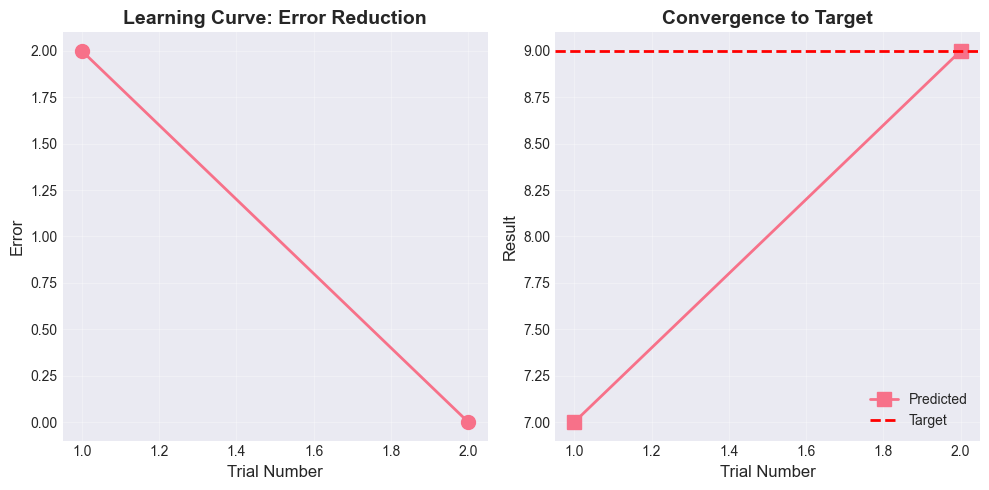


💡 Key Insight: Machine learning algorithms use the same principle!
   They make predictions, measure errors, and adjust to improve.


In [9]:
# Simulating Human-Like Learning for Equation Solving
print_section_header("Human-Like Learning Simulation", "🧠")

def equation_value(x):
    """Calculate 2x + 3"""
    return 2 * x + 3

def calculate_error(predicted, target=9):
    """Calculate how far off we are from the target"""
    return abs(target - predicted)

# Learning process
target = 9
trials = []

print("🎯 Goal: Find x such that 2x + 3 = 9\n")

# Trial 1
x_trial1 = 2
result1 = equation_value(x_trial1)
error1 = calculate_error(result1, target)
trials.append({'Trial': 1, 'x': x_trial1, 'Result': result1, 'Error': error1, 'Learning': 'x needs to be bigger'})
print(f"Trial 1: x = {x_trial1}")
print(f"  Result: 2({x_trial1}) + 3 = {result1}")
print(f"  Error: {error1}")
print(f"  Learning: x needs to be bigger\n")

# Trial 2
x_trial2 = 3
result2 = equation_value(x_trial2)
error2 = calculate_error(result2, target)
trials.append({'Trial': 2, 'x': x_trial2, 'Result': result2, 'Error': error2, 'Learning': 'Success!'})
print(f"Trial 2: x = {x_trial2}")
print(f"  Result: 2({x_trial2}) + 3 = {result2}")
print(f"  Error: {error2}")
print(f"  Learning: Success! ✓\n")

# Visualize the learning process
trials_df = pd.DataFrame(trials)
print("📊 Learning Progress:")
print(trials_df.to_string(index=False))

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(trials_df['Trial'], trials_df['Error'], marker='o', linewidth=2, markersize=10)
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Learning Curve: Error Reduction', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(trials_df['Trial'], trials_df['Result'], marker='s', linewidth=2, markersize=10, label='Predicted')
plt.axhline(y=target, color='r', linestyle='--', linewidth=2, label='Target')
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Result', fontsize=12)
plt.title('Convergence to Target', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Machine learning algorithms use the same principle!")
print("   They make predictions, measure errors, and adjust to improve.")

## 📊 Slide 3: The ML Learning Cycle

### Understanding the Complete Learning Process

Machine learning follows a cyclical process:

```
RAW DATA → LEARNING ALGORITHM → HYPOTHESIS → PREDICTIONS → FEEDBACK/ERROR → (Improve)
```

Let's visualize this cycle with a real example!


📊 The ML Learning Cycle



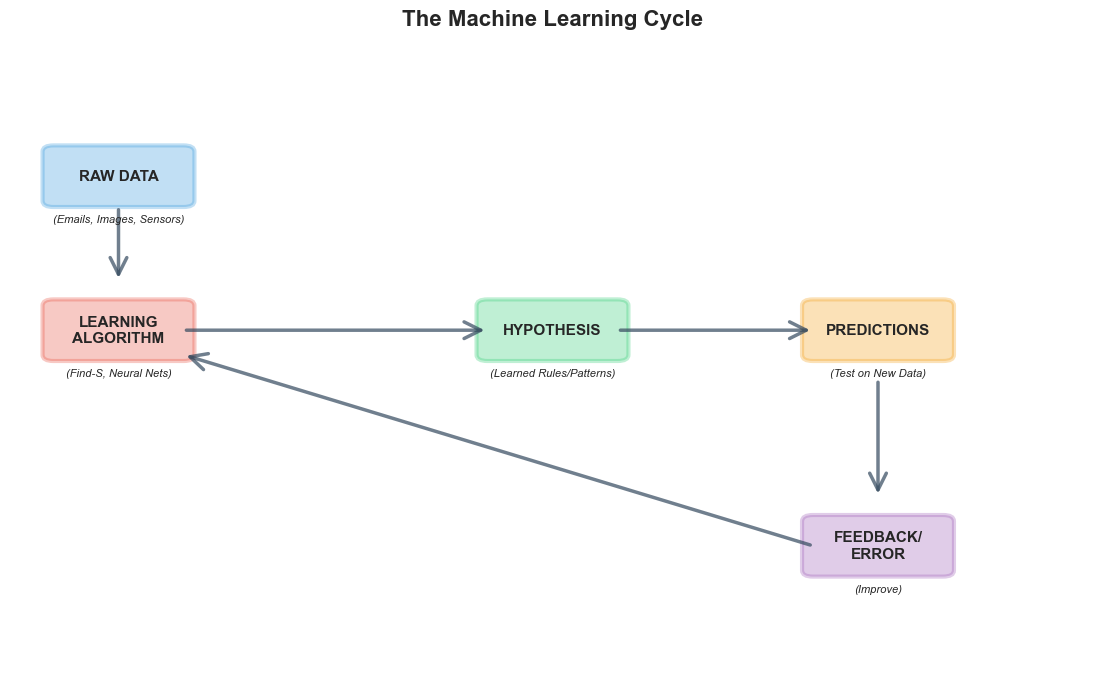


🔄 Key Components:
  1. Data feeds the algorithm
  2. Algorithm searches for patterns
  3. Creates a hypothesis (model)
  4. Tests and improves iteratively


In [21]:
# Visualizing the ML Learning Cycle
print_section_header("The ML Learning Cycle", "📊")

# Create a visual representation
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Define components
components = [
    {'name': 'RAW DATA', 'pos': (1, 8), 'color': '#3498db', 'example': 'Emails, Images, Sensors'},
    {'name': 'LEARNING\nALGORITHM', 'pos': (1, 5.5), 'color': '#e74c3c', 'example': 'Find-S, Neural Nets'},
    {'name': 'HYPOTHESIS', 'pos': (5, 5.5), 'color': '#2ecc71', 'example': 'Learned Rules/Patterns'},
    {'name': 'PREDICTIONS', 'pos': (8, 5.5), 'color': '#f39c12', 'example': 'Test on New Data'},
    {'name': 'FEEDBACK/\nERROR', 'pos': (8, 2), 'color': '#9b59b6', 'example': 'Improve'}
]

# Draw boxes
for comp in components:
    box = FancyBboxPatch((comp['pos'][0]-0.6, comp['pos'][1]-0.4), 1.2, 0.8,
                          boxstyle="round,pad=0.1", edgecolor=comp['color'],
                          facecolor=comp['color'], alpha=0.3, linewidth=3)
    ax.add_patch(box)
    ax.text(comp['pos'][0], comp['pos'][1], comp['name'],
            ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(comp['pos'][0], comp['pos'][1]-0.7, f"({comp['example']})",
            ha='center', va='center', fontsize=8, style='italic')

# Draw arrows
arrows = [
    ((1, 7.5), (1, 6.3)),      # Data to Algorithm
    ((1.6, 5.5), (4.4, 5.5)),  # Algorithm to Hypothesis
    ((5.6, 5.5), (7.4, 5.5)),  # Hypothesis to Predictions
    ((8, 4.7), (8, 2.8)),      # Predictions to Feedback
    ((7.4, 2), (1.6, 5.1))     # Feedback back to Algorithm
]

for start, end in arrows:
    arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=30,
                           linewidth=2.5, color='#34495e', alpha=0.7)
    ax.add_patch(arrow)

plt.title('The Machine Learning Cycle', fontsize=16, fontweight='bold', pad=20)
plt.show()

print("\n🔄 Key Components:")
print("  1. Data feeds the algorithm")
print("  2. Algorithm searches for patterns")
print("  3. Creates a hypothesis (model)")
print("  4. Tests and improves iteratively")

## 🤖 What is a Learning Algorithm?

### Simple Definition

A **learning algorithm** is like a smart student that figures out patterns or rules by looking at examples, then uses those patterns to solve new problems it has never seen before.

Think of it as:
- **Input:** Examples with correct answers
- **Process:** Find the hidden pattern or rule
- **Output:** A way to predict answers for new examples

### Example: Learning the Rule for 2x + 3y = 16

Let's say we want to teach a computer to find values of x and y that satisfy the equation **2x + 3y = 16**, but the computer doesn't know this equation exists!

#### Step 1: Provide Training Examples
We give the algorithm several examples of (x, y) pairs that work:

| Example | x | y | Result | Label |
|---------|---|---|---------|-------|
| 1 | 2 | 4 | 2(2) + 3(4) = 16 | ✅ Valid |
| 2 | 5 | 2 | 2(5) + 3(2) = 16 | ✅ Valid |
| 3 | 8 | 0 | 2(8) + 3(0) = 16 | ✅ Valid |
| 4 | 1 | 3 | 2(1) + 3(3) = 11 | ❌ Invalid |
| 5 | 3 | 5 | 2(3) + 3(5) = 21 | ❌ Invalid |

#### Step 2: Learning Process
The algorithm analyzes these examples and tries to discover the pattern:

```
🧠 Algorithm thinking:
"Let me see... when x=2 and y=4, it works..."
"When x=5 and y=2, it also works..."
"What's the relationship between x and y?"
"It looks like 2×(first number) + 3×(second number) always equals 16!"
```

#### Step 3: Learning the Rule
After seeing enough examples, the algorithm learns:
**"For any pair (x,y) to be valid: 2x + 3y must equal 16"**

#### Step 4: Making Predictions
Now we can test it on new examples it has never seen:

```python
# Test: Is (x=1, y=4.67) valid?
Algorithm prediction: 2(1) + 3(4.67) = 2 + 14 = 16 ✅ 
Result: "Yes, this pair is valid!"

# Test: Is (x=4, y=3) valid?
Algorithm prediction: 2(4) + 3(3) = 8 + 9 = 17 ❌
Result: "No, this pair is invalid!"
```

### Key Components of Learning

1. **Training Data:** The examples we show the algorithm
2. **Pattern Recognition:** The algorithm finds relationships in the data
3. **Model/Rule:** The learned pattern (in our case: 2x + 3y = 16)
4. **Prediction:** Using the learned rule on new, unseen examples

### Real-World Analogy

Imagine teaching a child to recognize spam emails:

- **Examples:** Show them 100 emails labeled "spam" or "not spam"
- **Learning:** Child notices patterns like "spam emails often have words like FREE, URGENT, $$$"
- **Rule:** "If email has excessive caps and money words → probably spam"
- **Application:** Child can now identify spam in new emails they've never seen

### Why This Matters

Learning algorithms power:
- 📧 Email spam filters (like in our notebook)
- 🎬 Netflix recommendations
- 🚗 Self-driving cars
- 🩺 Medical diagnosis systems
- 🔍 Search engines

The magic is that we don't program the specific rules—the algorithm **discovers them automatically** from examples!
---

# Part 2: Well-Posed Learning Problems

## 🎯 Slide 5: What is a Well-Posed Learning Problem?

### The Three Essential Elements

**Definition:** A computer program learns from experience **E** with respect to some task **T** and performance measure **P**, if its performance at **T** (measured by **P**) improves with experience **E**.

**The Three Components:**
1. **Task (T)** - What are we trying to do?
2. **Performance Measure (P)** - How do we measure success?
3. **Experience (E)** - What data do we learn from?

Let's explore this with real examples!


🎯 Well-Posed Learning Problems

📋 Examples of Well-Posed Learning Problems:

                Domain                            Task (T)                     Performance (P)                      Experience (E)               Business Impact
     Email Spam Filter Classify emails as spam or not spam   Accuracy % (correctly classified)          Database of labeled emails    Save 2 hours/employee/week
House Price Prediction            Predict house sale price  Mean Absolute Error ($ difference)         Historical house sales data      Better pricing decisions
       Fraud Detection    Identify fraudulent transactions F1-Score (balance precision/recall) Past transactions with fraud labels    Reduce fraud losses by 40%
     Medical Diagnosis      Diagnose disease from symptoms               Diagnostic accuracy %      Patient records with diagnoses     Earlier disease detection
         Checkers Game                       Play checkers                      % of games won         Games played a

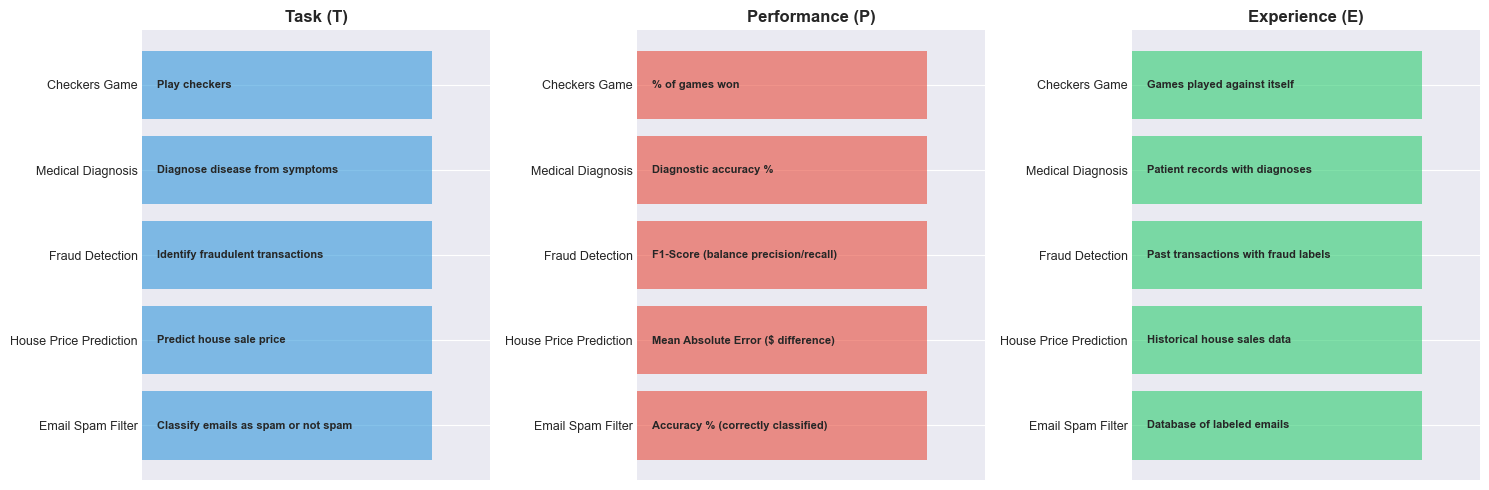


💡 Key Insight: A well-defined problem is half solved!
   Always clearly define T, P, and E before building a solution.


In [11]:
# Examples of Well-Posed Learning Problems
print_section_header("Well-Posed Learning Problems", "🎯")

# Define several learning problems
learning_problems = [
    {
        'Domain': 'Email Spam Filter',
        'Task (T)': 'Classify emails as spam or not spam',
        'Performance (P)': 'Accuracy % (correctly classified)',
        'Experience (E)': 'Database of labeled emails',
        'Business Impact': 'Save 2 hours/employee/week'
    },
    {
        'Domain': 'House Price Prediction',
        'Task (T)': 'Predict house sale price',
        'Performance (P)': 'Mean Absolute Error ($ difference)',
        'Experience (E)': 'Historical house sales data',
        'Business Impact': 'Better pricing decisions'
    },
    {
        'Domain': 'Fraud Detection',
        'Task (T)': 'Identify fraudulent transactions',
        'Performance (P)': 'F1-Score (balance precision/recall)',
        'Experience (E)': 'Past transactions with fraud labels',
        'Business Impact': 'Reduce fraud losses by 40%'
    },
    {
        'Domain': 'Medical Diagnosis',
        'Task (T)': 'Diagnose disease from symptoms',
        'Performance (P)': 'Diagnostic accuracy %',
        'Experience (E)': 'Patient records with diagnoses',
        'Business Impact': 'Earlier disease detection'
    },
    {
        'Domain': 'Checkers Game',
        'Task (T)': 'Play checkers',
        'Performance (P)': '% of games won',
        'Experience (E)': 'Games played against itself',
        'Business Impact': 'World championship level play'
    }
]

# Display as a formatted table
df_problems = pd.DataFrame(learning_problems)
print("📋 Examples of Well-Posed Learning Problems:\n")
print(df_problems.to_string(index=False))

# Visualize the components
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

components = ['Task (T)', 'Performance (P)', 'Experience (E)']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, (component, color) in enumerate(zip(components, colors)):
    ax = axes[idx]
    values = df_problems[component].tolist()
    domains = df_problems['Domain'].tolist()

    y_pos = np.arange(len(domains))
    ax.barh(y_pos, [1]*len(domains), color=color, alpha=0.6)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(domains, fontsize=9)
    ax.set_xlim(0, 1.2)
    ax.set_xticks([])
    ax.set_title(component, fontsize=12, fontweight='bold')

    # Add text annotations
    for i, (domain, value) in enumerate(zip(domains, values)):
        ax.text(0.05, i, value, va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: A well-defined problem is half solved!")
print("   Always clearly define T, P, and E before building a solution.")

## 📧 Slide 6: Real-World Example - Email Spam Filter

### Deep Dive into a Practical Application

Let's load our spam email dataset and explore how we can frame this as a well-posed learning problem.


📧 Email Spam Filter Example

📁 Current working directory: /Users/pruthvirajv/Library/CloudStorage/OneDrive-ArivuAIInnovationsPrivateLimited(2)/Oil & Gas/GSSS-DeepLearning-Course/MachineLearning/Module 1
Please choose spam_email_dataset.json dataset
📊 Dataset Description:
   Email Spam Classification Dataset

🔍 Attributes (Features):
   • has_money_words: ['Yes', 'No']
   • has_urgent_words: ['Yes', 'No']
   • has_links: ['Yes', 'No']
   • from_known_sender: ['Yes', 'No']
   • has_attachments: ['Yes', 'No']
   • proper_grammar: ['Yes', 'No']

📈 Training Data: 10 emails
📈 Test Data: 3 emails

📬 Sample Training Emails:

 email_id                                  subject has_money_words has_urgent_words from_known_sender is_spam
        1 URGENT: Claim your $1,000,000 prize NOW!             Yes              Yes                No     Yes
        2             Meeting notes from yesterday              No               No               Yes      No
        3 ACT NOW!!! Free money waiting for 

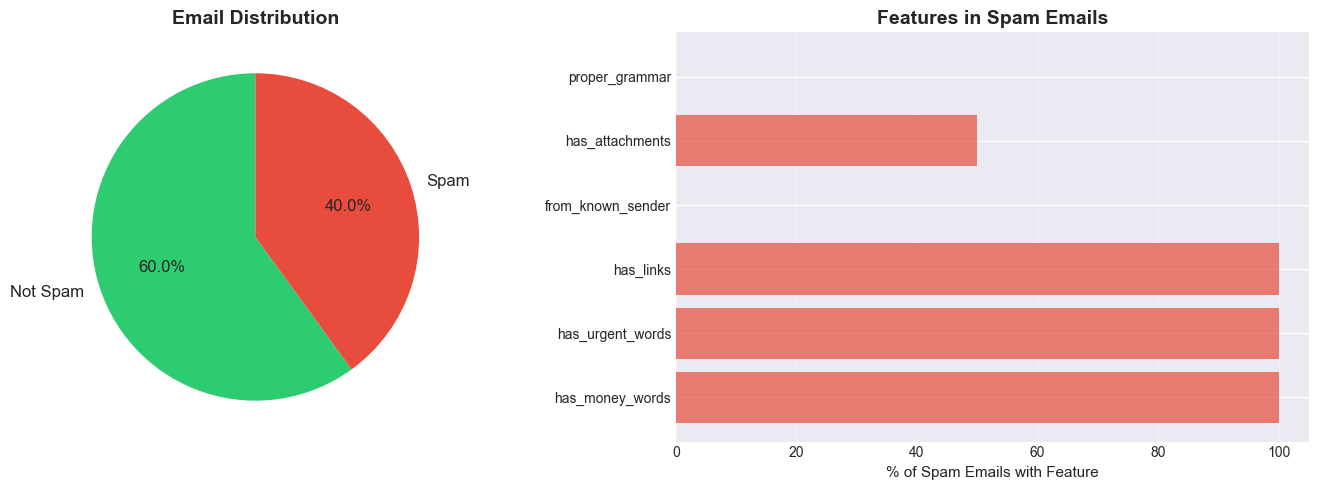


🎯 Well-Posed Problem Definition:
   Task (T): Classify emails as spam or not spam
   Performance (P): Accuracy % (correctly classified)
   Experience (E): Database of labeled emails with features

💼 Business Impact:
   • Gmail blocks 99.9% of spam and phishing attempts
   • Processes 100+ billion spam attempts daily
   • False positive rate < 0.05% (critical for user trust)


In [15]:
import os

# Load and explore the spam email dataset
print_section_header("Email Spam Filter Example", "📧")

print(f"📁 Current working directory: {os.getcwd()}")
# Load the data
print("Please choose spam_email_dataset.json dataset")
spam_data = load_json_data('data/spam_email_dataset.json')

print("📊 Dataset Description:")
print(f"   {spam_data['description']}\n")

print("🔍 Attributes (Features):")
for attr, values in spam_data['attributes'].items():
    print(f"   • {attr}: {values}")

# Convert to DataFrame
train_emails = pd.DataFrame(spam_data['training_data'])
test_emails = pd.DataFrame(spam_data['test_data'])

print(f"\n📈 Training Data: {len(train_emails)} emails")
print(f"📈 Test Data: {len(test_emails)} emails\n")

# Display sample emails
print("📬 Sample Training Emails:\n")
display_cols = ['email_id', 'subject', 'has_money_words', 'has_urgent_words',
                'from_known_sender', 'is_spam']
print(train_emails[display_cols].head(6).to_string(index=False))

# Analyze spam vs non-spam distribution
spam_counts = train_emails['is_spam'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(spam_counts.values, labels=['Not Spam', 'Spam'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90, textprops={'fontsize': 12})
axes[0].set_title('Email Distribution', fontsize=14, fontweight='bold')

# Feature correlation with spam
feature_cols = ['has_money_words', 'has_urgent_words', 'has_links',
                'from_known_sender', 'has_attachments', 'proper_grammar']

# Calculate spam correlation for each feature
spam_correlation = {}
for feature in feature_cols:
    spam_yes = train_emails[train_emails['is_spam'] == 'Yes'][feature].value_counts()
    if 'Yes' in spam_yes:
        spam_correlation[feature] = spam_yes['Yes'] / len(train_emails[train_emails['is_spam'] == 'Yes']) * 100
    else:
        spam_correlation[feature] = 0

axes[1].barh(list(spam_correlation.keys()), list(spam_correlation.values()),
             color='#e74c3c', alpha=0.7)
axes[1].set_xlabel('% of Spam Emails with Feature', fontsize=11)
axes[1].set_title('Features in Spam Emails', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Well-Posed Problem Definition:")
print("   Task (T): Classify emails as spam or not spam")
print("   Performance (P): Accuracy % (correctly classified)")
print("   Experience (E): Database of labeled emails with features")
print("\n💼 Business Impact:")
print("   • Gmail blocks 99.9% of spam and phishing attempts")
print("   • Processes 100+ billion spam attempts daily")
print("   • False positive rate < 0.05% (critical for user trust)")

---

# Part 3: Designing a Learning System

## What is Designing a Learning System?

Designing a learning system involves creating a complete framework that can automatically improve its performance on a specific task through experience. It's the process of building an end-to-end machine learning solution that can learn from data and make predictions or decisions.

### Key Components of a Learning System

1. **Problem Definition**
    - Clearly specify the task (T), performance measure (P), and experience (E)
    - Ensure the problem is well-posed

2. **Data Pipeline**
    - Data collection and preprocessing
    - Feature extraction and engineering
    - Data splitting (training, validation, testing)

3. **Algorithm Selection**
    - Choose appropriate learning algorithms
    - Consider the nature of the problem (classification, regression, clustering, etc.)

4. **Training Process**
    - Feed training data to the algorithm
    - Allow the system to learn patterns and relationships

5. **Evaluation and Validation**
    - Test the system's performance using the defined metrics
    - Validate results on unseen data

6. **Deployment and Monitoring**
    - Deploy the system in production
    - Monitor performance and retrain as needed

### Design Considerations

- **Scalability:** Can the system handle increasing amounts of data?
- **Robustness:** How well does it perform on new, unseen data?
- **Interpretability:** Can we understand how the system makes decisions?
- **Efficiency:** What are the computational and storage requirements?
- **Maintenance:** How easy is it to update and improve the system?

![Azure AI](images/AzureAI.png)


| Azure Service | Pricing Model | Example / Tier Cost | Key Pricing Factors |
|---|---|---|---|
| Azure Synapse Analytics | Pay-as-you-go or pre-purchase commit units | Commit Units (SCUs):<br>- 5,000 SCUs – $4,700<br>- 10,000 SCUs – $9,200<br>- 60,000 SCUs – $50,400<br>- 360,000 SCUs – $259,200 | Data pipelines, integration runtime hours, data flow execution |
| Azure Machine Learning | Consumption-based (per compute usage) | Compute clusters billed per vCPU/hr (e.g., $0.21–$3.06/hr depending on VM type); storage and managed endpoints extra | Compute instance size, training runtime, storage usage, model deployment hours |
| Azure SQL Database | vCore-based pricing model | General Purpose: $0.034–$0.971/vCore/hr<br>Business Critical: $0.10–$1.507/vCore/hr | vCores, tier (General Purpose / Business Critical), Azure Hybrid Benefit, backup storage |
| Azure Data Lake Storage Gen2 | Pay-as-you-go storage | Hot: $0.0184/GB/month<br>Cool: $0.01/GB/month<br>Archive: $0.00099/GB/month | Data redundancy (LRS/ZRS), access frequency, retrieval operations |
| Azure Stream Analytics (V2) | Pay-as-you-go with tiered discounts | Job (Standard V2): from ~$0.11 per SU/hour<br>Cluster (Dedicated V2): from ~$1.10 per SU/hour | Streaming Units (SU) count, job type, region, runtime duration |
| Azure Data Factory | Pay-as-you-go (usage-based) | Pipeline orchestration: ~$1 per 1,000 runs<br>Data movement: $0.25 per DIU-hour<br>Mapping data flow: ~$0.84 per vCore-hour | Number of activities, data volume, compute runtime, pipeline schedule |

### Example: Our Spam Classification System

In our previous example, we designed a learning system for email spam detection:
- **Architecture:** Text preprocessing → Vectorization → Naive Bayes → Classification
- **Learning Process:** Trained on labeled email data to identify spam patterns
- **Evaluation:** Measured performance using accuracy on test data
- **Decision Making:** Can now classify new emails automatically

A well-designed learning system creates a complete pipeline from raw data to actionable insights or decisions.


♟️ Checkers Learning System Design

Please choose checkers_training_data.json dataset
🎮 Checkers Learning Problem:
   Task (T): Playing checkers
   Performance (P): % of games won in world tournament
   Experience (E): Games played against itself

📊 Board Features (Input):
   x1: Number of black pieces
   x2: Number of red pieces
   x3: Number of black kings
   x4: Number of red kings
   x5: Number of black pieces threatened
   x6: Number of red pieces threatened

🎯 Target Function:
   V(b) = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6

   Where:
   • w0 = bias term (constant)
   • w1...w6 = weights to be learned
   • V(b) = evaluation score for board state b
   • V(b) = +100 if win, -100 if loss, 0 if draw

📋 Sample Training Examples:

 board_id  x1  x2  x3  x4  x5  x6  V_train                                  description
        1  12  12   0   0   0   0        0                  Opening position - balanced
        2   8   6   1   0   1   2       75 Black has advantage - more

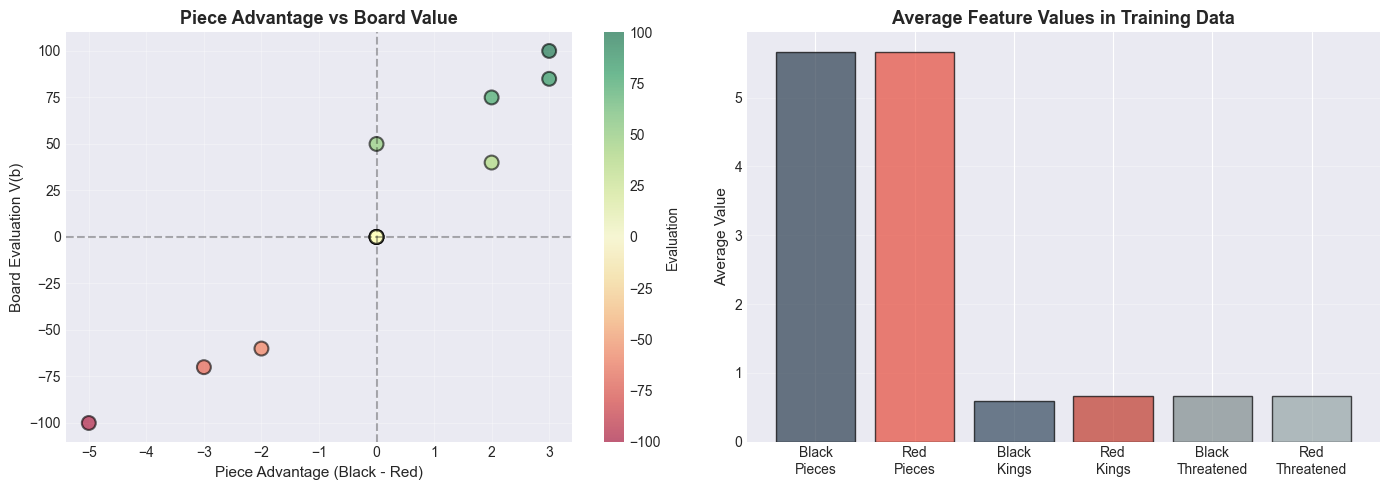


💡 Key Design Decisions:
   1. Training Experience: Self-play (no external trainer needed)
   2. Target Function: V(b) - board evaluation function
   3. Representation: Linear combination of 6 board features
   4. Learning Algorithm: LMS (Least Mean Squares) weight update


In [16]:
# Load checkers training data
print_section_header("Checkers Learning System Design", "♟️")

print("Please choose checkers_training_data.json dataset")
checkers_data = load_json_data('data/checkers_training_data.json')

print("🎮 Checkers Learning Problem:")
print("   Task (T): Playing checkers")
print("   Performance (P): % of games won in world tournament")
print("   Experience (E): Games played against itself\n")

print("📊 Board Features (Input):")
for feature, description in checkers_data['features'].items():
    print(f"   {feature}: {description}")

print(f"\n🎯 Target Function:")
print(f"   {checkers_data['target_function']}")
print("\n   Where:")
print("   • w0 = bias term (constant)")
print("   • w1...w6 = weights to be learned")
print("   • V(b) = evaluation score for board state b")
print("   • V(b) = +100 if win, -100 if loss, 0 if draw\n")

# Load and display training examples
train_boards = pd.DataFrame(checkers_data['training_examples'])

print("📋 Sample Training Examples:\n")
display_cols = ['board_id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'V_train', 'description']
print(train_boards[display_cols].head(8).to_string(index=False))

# Visualize board evaluations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Piece advantage vs evaluation
train_boards['piece_advantage'] = train_boards['x1'] - train_boards['x2']
train_boards['king_advantage'] = train_boards['x3'] - train_boards['x4']

scatter = axes[0].scatter(train_boards['piece_advantage'], train_boards['V_train'],
                          c=train_boards['V_train'], cmap='RdYlGn', s=100, alpha=0.6,
                          edgecolors='black', linewidth=1.5)
axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.3)
axes[0].set_xlabel('Piece Advantage (Black - Red)', fontsize=11)
axes[0].set_ylabel('Board Evaluation V(b)', fontsize=11)
axes[0].set_title('Piece Advantage vs Board Value', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Evaluation')

# Bar chart: Feature importance visualization
feature_names = ['Black\nPieces', 'Red\nPieces', 'Black\nKings',
                 'Red\nKings', 'Black\nThreatened', 'Red\nThreatened']
avg_values = [train_boards['x1'].mean(), train_boards['x2'].mean(),
              train_boards['x3'].mean(), train_boards['x4'].mean(),
              train_boards['x5'].mean(), train_boards['x6'].mean()]

colors_bar = ['#2c3e50', '#e74c3c', '#34495e', '#c0392b', '#7f8c8d', '#95a5a6']
axes[1].bar(feature_names, avg_values, color=colors_bar, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Average Value', fontsize=11)
axes[1].set_title('Average Feature Values in Training Data', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Design Decisions:")
print("   1. Training Experience: Self-play (no external trainer needed)")
print("   2. Target Function: V(b) - board evaluation function")
print("   3. Representation: Linear combination of 6 board features")
print("   4. Learning Algorithm: LMS (Least Mean Squares) weight update")

### Implementing the LMS Weight Update Rule

The **Least Mean Squares (LMS)** algorithm adjusts weights to minimize the squared error between predicted and actual board evaluations.

**LMS Update Rule:**
```
For each training example (b, V_train(b)):
  1. Calculate V(b) using current weights
  2. For each weight wi:
       wi ← wi + η * (V_train(b) - V(b)) * xi
```

Where:
- η (eta) = learning rate (e.g., 0.1)
- V_train(b) = target value
- V(b) = predicted value
- xi = feature value


🔧 LMS Algorithm Implementation

🎓 Training Checkers Board Evaluator...

Initial weights (random):
  w0=0.050, w1=-0.014, w2=0.065,
  w3=0.152, w4=-0.023, w5=-0.023, w6=0.158

Epoch  20: MSE =   197.97
Epoch  40: MSE =   183.61
Epoch  60: MSE =   185.04
Epoch  80: MSE =   189.70
Epoch 100: MSE =   194.84

✅ Training Complete!

Learned weights:
  w0=-0.478 (bias)
  w1=20.247 (black pieces)
  w2=-21.551 (red pieces)
  w3=21.538 (black kings)
  w4=-6.239 (red kings)
  w5=-5.380 (black threatened)
  w6=-4.516 (red threatened)


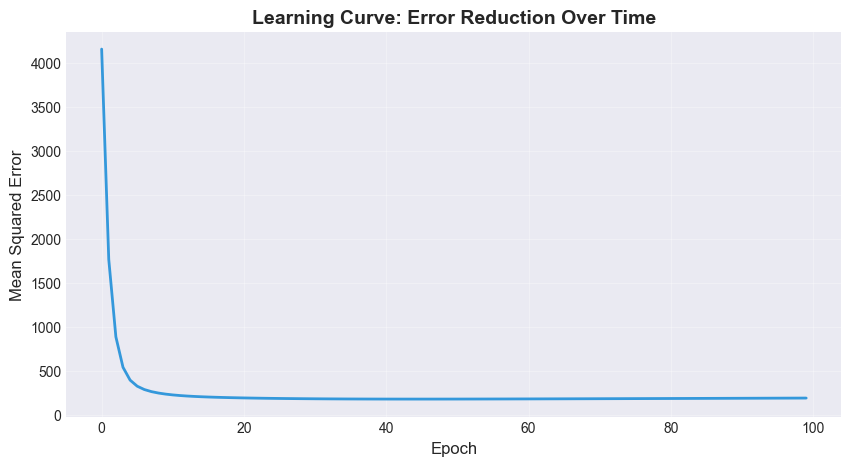


🧪 Testing on New Board Positions:

Board 13: Test position - predict outcome
  Features: x1=9, x2=6, x3=2, x4=0, x5=0, x6=3
  Predicted V(b) = 81.97
  → Black has advantage! 🎯

Board 14: Test position - predict outcome
  Features: x1=4, x2=7, x3=0, x4=1, x5=2, x6=0
  Predicted V(b) = -87.35
  → Red has advantage! ⚠️

Board 15: Test position - predict outcome
  Features: x1=5, x2=5, x3=1, x4=1, x5=1, x6=1
  Predicted V(b) = -1.60
  → Balanced position ⚖️



In [17]:
# Implement LMS algorithm for checkers
print_section_header("LMS Algorithm Implementation", "🔧")

class CheckersLearner:
    """Simple checkers board evaluator using LMS algorithm"""

    def __init__(self, learning_rate=0.01):
        """Initialize with random small weights"""
        self.learning_rate = learning_rate
        # Initialize weights: w0 (bias), w1-w6 (features)
        self.weights = np.random.randn(7) * 0.1
        self.training_history = []

    def evaluate_board(self, features):
        """
        Evaluate board position using current weights.
        V(b) = w0 + w1*x1 + w2*x2 + ... + w6*x6
        """
        # Add bias term (1.0) to features
        features_with_bias = np.concatenate([[1.0], features])
        return np.dot(self.weights, features_with_bias)

    def train_step(self, features, target_value):
        """
        Perform one LMS weight update step.
        """
        # Calculate prediction
        predicted_value = self.evaluate_board(features)

        # Calculate error
        error = target_value - predicted_value

        # Update weights: wi ← wi + η * error * xi
        features_with_bias = np.concatenate([[1.0], features])
        self.weights += self.learning_rate * error * features_with_bias

        return predicted_value, error

    def train(self, training_data, epochs=100):
        """
        Train on multiple epochs through the data.
        """
        for epoch in range(epochs):
            total_error = 0

            for example in training_data:
                features = np.array([example['x1'], example['x2'], example['x3'],
                                   example['x4'], example['x5'], example['x6']])
                target = example['V_train']

                predicted, error = self.train_step(features, target)
                total_error += error ** 2

            # Calculate mean squared error
            mse = total_error / len(training_data)
            self.training_history.append(mse)

            if (epoch + 1) % 20 == 0:
                print(f"Epoch {epoch+1:3d}: MSE = {mse:8.2f}")

# Train the model
learner = CheckersLearner(learning_rate=0.01)

print("🎓 Training Checkers Board Evaluator...\n")
print("Initial weights (random):")
print(f"  w0={learner.weights[0]:.3f}, w1={learner.weights[1]:.3f}, w2={learner.weights[2]:.3f},")
print(f"  w3={learner.weights[3]:.3f}, w4={learner.weights[4]:.3f}, w5={learner.weights[5]:.3f}, w6={learner.weights[6]:.3f}\n")

learner.train(checkers_data['training_examples'], epochs=100)

print("\n✅ Training Complete!\n")
print("Learned weights:")
print(f"  w0={learner.weights[0]:.3f} (bias)")
print(f"  w1={learner.weights[1]:.3f} (black pieces)")
print(f"  w2={learner.weights[2]:.3f} (red pieces)")
print(f"  w3={learner.weights[3]:.3f} (black kings)")
print(f"  w4={learner.weights[4]:.3f} (red kings)")
print(f"  w5={learner.weights[5]:.3f} (black threatened)")
print(f"  w6={learner.weights[6]:.3f} (red threatened)")

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(learner.training_history, linewidth=2, color='#3498db')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Learning Curve: Error Reduction Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Test on new board positions
print("\n🧪 Testing on New Board Positions:\n")
for test_board in checkers_data['test_examples']:
    features = np.array([test_board['x1'], test_board['x2'], test_board['x3'],
                        test_board['x4'], test_board['x5'], test_board['x6']])
    prediction = learner.evaluate_board(features)

    print(f"Board {test_board['board_id']}: {test_board['description']}")
    print(f"  Features: x1={test_board['x1']}, x2={test_board['x2']}, x3={test_board['x3']}, "
          f"x4={test_board['x4']}, x5={test_board['x5']}, x6={test_board['x6']}")
    print(f"  Predicted V(b) = {prediction:.2f}")

    if prediction > 20:
        print(f"  → Black has advantage! 🎯\n")
    elif prediction < -20:
        print(f"  → Red has advantage! ⚠️\n")
    else:
        print(f"  → Balanced position ⚖️\n")

# Types and Categories of Learning Algorithms

Machine learning algorithms can be categorized in several different ways based on various criteria such as the type of learning, the nature of the data, and the problem they solve. Here's a comprehensive overview:

## 1. Based on Learning Style

### **Supervised Learning**
- **Definition:** Learns from labeled training data to make predictions on new, unseen data
- **Examples:** Classification, Regression
- **Algorithms:** 
    - Linear Regression, Logistic Regression
    - Decision Trees, Random Forest
    - Support Vector Machines (SVM)
    - Neural Networks
    - Naive Bayes (like our spam classifier)
    - Find-S, Candidate-Elimination (concept learning)

### **Unsupervised Learning**
- **Definition:** Finds hidden patterns in data without labeled examples
- **Examples:** Clustering, Dimensionality Reduction, Association Rules
- **Algorithms:**
    - K-Means Clustering
    - Hierarchical Clustering
    - Principal Component Analysis (PCA)
    - DBSCAN
    - Apriori Algorithm

### **Semi-Supervised Learning**
- **Definition:** Uses both labeled and unlabeled data for training
- **Use Case:** When labeled data is expensive but unlabeled data is abundant
- **Examples:** Self-training, Co-training

### **Reinforcement Learning**
- **Definition:** Learns through interaction with an environment using rewards and penalties
- **Examples:** Game playing, Robot navigation, Autonomous vehicles
- **Algorithms:** Q-Learning, Policy Gradient Methods, Actor-Critic

## 2. Based on Problem Type

### **Classification**
- **Goal:** Predict discrete categories or classes
- **Examples:** 
    - Email spam detection (Spam/Not Spam)
    - Image recognition (Cat/Dog/Bird)
    - Medical diagnosis (Disease/No Disease)
- **Algorithms:** Decision Trees, SVM, Naive Bayes, Neural Networks

### **Regression**
- **Goal:** Predict continuous numerical values
- **Examples:**
    - House price prediction
    - Stock price forecasting
    - Temperature prediction
- **Algorithms:** Linear Regression, Polynomial Regression, Neural Networks

### **Clustering**
- **Goal:** Group similar data points together
- **Examples:**
    - Customer segmentation
    - Gene sequencing
    - Market research
- **Algorithms:** K-Means, Hierarchical Clustering, DBSCAN

### **Association Rule Learning**
- **Goal:** Find relationships between different items
- **Examples:**
    - Market basket analysis ("People who buy bread also buy butter")
    - Web usage patterns
- **Algorithms:** Apriori, FP-Growth

## 3. Based on Learning Approach

### **Eager Learning**
- **Definition:** Constructs a general model before receiving test instances
- **Characteristics:** 
    - Fast prediction time
    - Slower training time
    - Generalizes during training
- **Examples:** Decision Trees, Neural Networks, Naive Bayes

### **Lazy Learning**
- **Definition:** Defers generalization until a test instance is encountered
- **Characteristics:**
    - Fast training time
    - Slower prediction time
    - Stores training data and generalizes locally
- **Examples:** k-Nearest Neighbors (k-NN), Case-Based Reasoning

## 4. Based on Learning Paradigm

### **Batch Learning (Offline Learning)**
- **Definition:** Learns from the entire training dataset at once
- **Characteristics:**
    - Requires all data to be available upfront
    - Model is trained once and deployed
- **Examples:** Most traditional ML algorithms

### **Online Learning (Incremental Learning)**
- **Definition:** Learns incrementally from a stream of data
- **Characteristics:**
    - Adapts to new data continuously
    - Memory efficient for large datasets
    - Can adapt to changing patterns
- **Examples:** Perceptron, Online Gradient Descent

### **Active Learning**
- **Definition:** Algorithm selects which examples to learn from
- **Characteristics:**
    - Minimizes labeling effort
    - Focuses on most informative examples
- **Examples:** Query by Committee, Uncertainty Sampling

## 5. Based on Model Complexity

### **Linear Models**
- **Characteristics:** Assume linear relationships
- **Examples:** Linear Regression, Logistic Regression, Perceptron
- **Pros:** Simple, interpretable, fast
- **Cons:** Limited expressiveness

### **Non-Linear Models**
- **Characteristics:** Can capture complex relationships
- **Examples:** Decision Trees, Neural Networks, SVM with kernels
- **Pros:** More expressive, can handle complex patterns
- **Cons:** More complex, potentially harder to interpret

### **Ensemble Methods**
- **Definition:** Combine multiple models for better performance
- **Types:**
    - **Bagging:** Random Forest, Extra Trees
    - **Boosting:** AdaBoost, Gradient Boosting, XGBoost
    - **Stacking:** Meta-learning approaches

## 6. Based on Data Type

### **Structured Data Algorithms**
- **Data Type:** Tabular data with defined features
- **Examples:** Decision Trees, Random Forest, SVM, Linear Models

### **Unstructured Data Algorithms**
- **Data Type:** Text, images, audio, video
- **Examples:**
    - **Text:** Natural Language Processing, Text Mining
    - **Images:** Convolutional Neural Networks (CNN)
    - **Audio:** Recurrent Neural Networks (RNN)

### **Time Series Algorithms**
- **Data Type:** Sequential data with temporal dependencies
- **Examples:** ARIMA, LSTM, Prophet

## 7. Based on Theoretical Foundation

### **Statistical Learning**
- **Foundation:** Statistical theory and probability
- **Examples:** Naive Bayes, Logistic Regression, Gaussian Mixture Models
- **Focus:** Mathematical rigor, assumptions about data distribution

### **Information-Theoretic Learning**
- **Foundation:** Information theory concepts like entropy
- **Examples:** Decision Trees (using information gain), Maximum Entropy models
- **Focus:** Information content, uncertainty reduction

### **Similarity-Based Learning**
- **Foundation:** Distance metrics and similarity measures
- **Examples:** k-NN, k-Means, SVM
- **Focus:** Finding similar patterns or examples

### **Logic-Based Learning**
- **Foundation:** Logical reasoning and symbolic representation
- **Examples:** Decision Trees, Rule-based systems, Inductive Logic Programming
- **Focus:** Interpretable rules and logical relationships

## 8. Modern Deep Learning Categories

### **Deep Neural Networks**
- **Feedforward Networks:** Multi-layer Perceptrons
- **Convolutional Networks (CNN):** Image processing
- **Recurrent Networks (RNN/LSTM/GRU):** Sequential data
- **Transformer Networks:** Attention-based models for NLP

### **Generative Models**
- **Generative Adversarial Networks (GANs):** Generate new data
- **Variational Autoencoders (VAE):** Learn data representations
- **Diffusion Models:** Recent advances in image generation

## Connection to Our Module

In our Module 1, we focused primarily on:

- **Supervised Learning:** Using labeled examples to learn concepts
- **Classification:** Binary classification (Spam/Not Spam, EnjoySport Yes/No)
- **Eager Learning:** Algorithms that build models during training
- **Logic-Based Learning:** Concept learning with logical constraints
- **Batch Learning:** Learning from complete training sets

The **Find-S** and **Candidate-Elimination** algorithms represent early examples of **concept learning** algorithms that use logical representation and search through hypothesis spaces to find consistent rules.

## Key Takeaways

1. **No Single Best Algorithm:** Different algorithms work better for different types of problems
2. **Problem-Algorithm Matching:** Choose algorithms based on your data type, problem complexity, and requirements
3. **Trade-offs Exist:** Between interpretability and performance, training time and accuracy, etc.
4. **Evolution of Field:** From simple statistical methods to complex deep learning systems
5. **Combination Approaches:** Modern systems often combine multiple algorithms (ensemble methods)

Understanding these categories helps in selecting the right approach for specific machine learning problems and provides a framework for organizing the vast landscape of ML algorithms.

## Early Examples of Concept Learning Algorithms

When we say that **Find-S** and **Candidate-Elimination** are "early examples of concept learning algorithms," we're referring to their historical significance and foundational role in the development of machine learning theory and practice.

### Historical Context

**1. Pioneering Research (1970s-1980s)**
- These algorithms were developed during the early days of artificial intelligence research
- They represent some of the first systematic approaches to automated learning from examples
- Introduced fundamental concepts that still influence modern machine learning

**2. Foundational Contributions**
- **Find-S** (1970s): One of the first algorithms to formalize the process of learning from positive examples
- **Candidate-Elimination** (1982): Tom Mitchell's seminal work that introduced version spaces and formal learning theory

### Why They're Considered "Early" Examples

**1. Chronological Order**
```
1970s-1980s: Find-S, Candidate-Elimination (Concept Learning)
1990s: Decision Trees, Neural Networks gain popularity  
2000s: Support Vector Machines, Ensemble Methods
2010s: Deep Learning revolution
```

**2. Theoretical Foundation**
- Established core concepts like:
    - Hypothesis spaces
    - Inductive bias
    - Version spaces
    - Learning as search through hypothesis space

**3. Simple Yet Powerful Framework**
- Used basic logical representation (conjunctions of constraints)
- Clear mathematical formulation
- Easy to understand and analyze theoretically

### What Makes Them "Concept Learning" Algorithms

**Definition of Concept Learning:**
Learning to distinguish between positive and negative examples of a concept by finding rules or patterns that capture the essence of what defines that concept.

**Key Characteristics:**
1. **Boolean Classification**: Learn Yes/No decisions
2. **Symbolic Representation**: Use logical rules rather than numerical models  
3. **Hypothesis Formation**: Explicitly represent learned knowledge as testable rules
4. **Inductive Reasoning**: Generalize from specific examples to general rules

### Comparison with Modern Algorithms

| Aspect | Find-S/Candidate-Elimination | Modern ML (e.g., Neural Networks) |
|--------|------------------------------|-----------------------------------|
| **Era** | 1970s-1980s | 1980s-present (deep learning 2010s+) |
| **Representation** | Logical rules | Mathematical functions/weights |
| **Interpretability** | Very high | Often low ("black box") |
| **Scalability** | Limited | High |
| **Noise Handling** | Poor | Good |
| **Problem Types** | Simple concepts | Complex patterns |

### Legacy and Influence

**1. Theoretical Contributions**
- Introduced formal definitions of learning problems (Task, Performance, Experience)
- Established the importance of inductive bias
- Created framework for analyzing learning algorithms

**2. Educational Value**
- Perfect for teaching fundamental ML concepts
- Clear examples of how learning algorithms work
- Bridge between human intuition and machine learning

**3. Modern Relevance**
- Principles still apply in:
    - Rule-based expert systems
    - Interpretable AI
    - Active learning
    - Constraint-based learning

### Why We Study Them Today

Even though these algorithms aren't used in most modern applications, they remain valuable because:

1. **Conceptual Foundation**: Understanding these helps grasp more complex algorithms
2. **Theoretical Insights**: They illustrate fundamental principles that apply to all learning
3. **Interpretability**: In an era of "black box" AI, their transparency is valuable
4. **Problem Analysis**: They help identify when simple solutions might work better than complex ones

**Example from Our Module:**
Our spam classifier using Naive Bayes (67% accuracy) is more practical than Candidate-Elimination for real-world email filtering, but studying Candidate-Elimination helps us understand:
- Why inductive bias is necessary
- How learning algorithms search hypothesis spaces  
- What it means for hypotheses to be "consistent" with data
- Why noise handling is crucial in practical systems

These early concept learning algorithms serve as the "building blocks" that help us understand the theoretical foundations underlying all of machine learning, even the most advanced deep learning systems used today.
# Perspectives and Issues in Machine Learning


Machine learning, while powerful and transformative, comes with various perspectives and challenges that practitioners must consider. Understanding these issues is crucial for developing responsible and effective ML systems.

### Different Perspectives on Machine Learning

#### 1. **Statistical Perspective**
- Views ML as statistical inference and pattern recognition
- Focuses on mathematical foundations, probability theory, and statistical significance
- Emphasizes hypothesis testing, confidence intervals, and model assumptions

#### 2. **Computer Science Perspective**
- Treats ML as algorithmic problem-solving and computational efficiency
- Focuses on algorithm design, data structures, and computational complexity
- Emphasizes scalability, optimization, and system architecture

#### 3. **Engineering Perspective**
- Views ML as building robust, deployable systems
- Focuses on reliability, maintainability, and production readiness
- Emphasizes MLOps, monitoring, and system integration

#### 4. **Business Perspective**
- Treats ML as a tool for competitive advantage and value creation
- Focuses on ROI, business metrics, and strategic alignment
- Emphasizes practical applications and measurable outcomes

### Major Issues and Challenges

#### **1. Data Quality and Bias**
- **Garbage In, Garbage Out:** Poor quality data leads to unreliable models
- **Bias in Training Data:** Historical biases can be perpetuated by ML systems
- **Missing or Incomplete Data:** Can lead to skewed results and poor generalization

#### **2. Ethical and Fairness Concerns**
- **Algorithmic Bias:** Models may discriminate against certain groups
- **Privacy Violations:** Misuse of personal data and privacy breaches
- **Transparency:** "Black box" models that lack interpretability

#### **3. Technical Challenges**
- **Overfitting:** Models that memorize training data but fail on new data
- **Curse of Dimensionality:** Performance degradation with high-dimensional data
- **Model Interpretability:** Difficulty in understanding complex model decisions

#### **4. Deployment and Maintenance Issues**
- **Model Drift:** Performance degradation over time as data patterns change
- **Scalability:** Challenges in handling increasing data volumes and user demands
- **Version Control:** Managing multiple model versions and updates

#### **5. Regulatory and Legal Challenges**
- **Compliance:** Adhering to regulations like GDPR, CCPA, and industry standards
- **Liability:** Determining responsibility when ML systems make errors
- **Intellectual Property:** Protecting proprietary algorithms and data

### Best Practices for Addressing These Issues

1. **Establish Clear Governance:** Define roles, responsibilities, and decision-making processes
2. **Implement Robust Testing:** Use comprehensive validation strategies and performance monitoring
3. **Ensure Data Quality:** Implement data validation, cleaning, and bias detection procedures
4. **Promote Transparency:** Document models, assumptions, and limitations clearly
5. **Plan for Maintenance:** Design systems for continuous monitoring and updates
6. **Consider Ethics Early:** Integrate fairness and ethical considerations from the beginning

Understanding these perspectives and proactively addressing these issues is essential for building successful, responsible, and sustainable machine learning systems.

---

# Part 4: Concept Learning Fundamentals

## Understanding Concepts and Hypotheses in Machine Learning

### What is a Concept?

A **concept** is a general idea, category, or class that represents a collection of objects, events, or patterns that share common characteristics. In machine learning, a concept is the target knowledge we want our system to learn and understand.

**Key aspects of concepts:**
- **Abstract representation:** Concepts capture the essence of what makes something belong to a particular category
- **Generalizable:** Once learned, concepts can be applied to classify new, unseen instances
- **Rule-based:** Concepts can often be described by a set of rules or conditions

**Examples of concepts:**
- "Spam email" - emails that are unsolicited, promotional, or fraudulent
- "Cat" - four-legged mammals with whiskers, retractable claws, and specific behavioral patterns
- "Fraud transaction" - financial transactions that are unauthorized or deceptive

### What is a Hypothesis?

A **hypothesis** is a proposed explanation or educated guess about how to define or recognize a concept. In machine learning, it represents the algorithm's current understanding of the pattern or rule that distinguishes positive examples (belonging to the concept) from negative examples (not belonging to the concept).

**Key aspects of hypotheses:**
- **Testable prediction:** A hypothesis can be evaluated against data to see how well it performs
- **Iterative refinement:** Hypotheses are continuously updated as the algorithm sees more examples
- **Representation of learning:** The hypothesis embodies what the machine has learned about the concept

**Examples of hypotheses:**
- "Emails containing words like 'FREE', 'URGENT', and '$$$' are spam"
- "Images with pointed ears, whiskers, and fur patterns are cats"
- "Transactions occurring at unusual times with large amounts are fraudulent"

### The Relationship Between Concepts and Hypotheses

- **Target:** The concept is what we want to learn (the true, ideal definition)
- **Approximation:** The hypothesis is our best current approximation of that concept
- **Learning process:** Machine learning algorithms generate and refine hypotheses to get as close as possible to the true concept
- **Evaluation:** We test hypotheses against new data to see how well they capture the concept

In our spam email example, the **concept** is "spam email" (the true nature of what makes an email spam), while our **hypothesis** is the learned pattern from our Naive Bayes model that achieved 67% accuracy in distinguishing spam from legitimate emails.

## What is a Concept Learning Task?

A **concept learning task** is a fundamental type of machine learning problem where the goal is to learn a general definition or rule that can distinguish between positive and negative examples of a concept. It involves acquiring knowledge about a concept from a set of training examples and then applying this knowledge to classify new, unseen instances.

### Example: Learning the Concept of "Weekend Day"

Let's illustrate concept learning with a simple example where we want to learn the concept of "Weekend Day" from training examples.

**Training Examples:**
- Monday → Not Weekend (Negative Example)
- Tuesday → Not Weekend (Negative Example) 
- Wednesday → Not Weekend (Negative Example)
- Thursday → Not Weekend (Negative Example)
- Friday → Not Weekend (Negative Example)
- Saturday → Weekend (Positive Example)
- Sunday → Weekend (Positive Example)

**Learning Process:**
1. **Initial Hypothesis:** The algorithm starts with no knowledge about what defines a weekend
2. **Pattern Recognition:** After seeing examples, it learns that Saturday and Sunday are positive examples
3. **Rule Formation:** The learned concept becomes: "Weekend = {Saturday, Sunday}"
4. **Generalization:** When presented with a new day, the system can classify it correctly

**Testing the Learned Concept:**
- Input: "Saturday" → Output: Weekend (Correct!)
- Input: "Monday" → Output: Not Weekend (Correct!)

This simple example demonstrates how concept learning works: from specific labeled examples, the algorithm learns a general rule that can be applied to classify new instances.

### What is a Hypothesis in Concept Learning?

A **hypothesis** in concept learning is a proposed explanation or rule that attempts to define the target concept. It represents the algorithm's current understanding of what distinguishes positive examples (instances that belong to the concept) from negative examples (instances that don't belong to the concept).

#### Key Aspects of Hypotheses:

**1. Definition**
- A hypothesis is essentially a "guess" or theory about the concept being learned
- It's a rule or pattern that the learning algorithm believes captures the essence of the target concept
- In our spam email example, a hypothesis might be: "Emails containing words like 'FREE', 'URGENT', or 'money' are spam"

**2. Hypothesis Space**
- The **hypothesis space** is the set of all possible hypotheses that the learning algorithm can consider
- It defines the boundaries of what the algorithm can potentially learn
- A larger hypothesis space allows for more complex concepts but may require more training data

**3. Hypothesis Evolution**
- **Initial Hypothesis:** Often starts as a random guess or the most general/specific possible rule
- **Refinement:** Updated based on training examples to better fit the data
- **Final Hypothesis:** The best rule found that correctly classifies the training examples

#### Example: Learning "Spam Email" Concept

Let's trace how a hypothesis evolves:

**Initial Hypothesis (before seeing any data):**
- H₀: "All emails are spam" (too general)

**After seeing first positive example:** *"FREE MONEY! Act now!"*
- H₁: "Emails containing 'FREE' and 'MONEY' are spam"

**After seeing first negative example:** *"Meeting scheduled for tomorrow"*
- H₂: "Emails containing promotional words ('FREE', 'MONEY', 'URGENT') are spam"

**After seeing more examples:**
- H₃: "Emails containing promotional language AND lacking professional context are spam"

#### Types of Hypotheses:

**1. Most General Hypothesis**
- Classifies all instances as positive
- Example: "Every email is spam"

**2. Most Specific Hypothesis**
- Classifies only exact matches of seen positive examples as positive
- Example: "Only the email 'FREE MONEY! Act now!' is spam"

**3. Intermediate Hypotheses**
- Balance between generality and specificity
- Example: "Emails with excessive capitalization and monetary offers are spam"

#### Hypothesis Evaluation:

**Consistency:** A hypothesis is consistent if it correctly classifies all training examples

**Completeness:** A hypothesis is complete if it can classify any possible instance

**Generalization:** A good hypothesis should work well on new, unseen instances

#### In Our Spam Classification Example:

Our trained model has learned a hypothesis that:
- Uses word frequency patterns (via CountVectorizer)
- Applies probabilistic rules (via MultinomialNB)
- Achieved 67% accuracy on test data

The hypothesis effectively learned that certain word patterns (like promotional language) are strong indicators of spam emails.

#### Common Challenges:

- **Overfitting:** Hypothesis too specific to training data
- **Underfitting:** Hypothesis too general to capture the concept
- **Noise:** Incorrect training examples can lead to poor hypotheses
- **Insufficient Data:** Limited examples may result in incomplete hypotheses

Understanding hypotheses is crucial because they represent the "knowledge" that machine learning algorithms acquire from data, enabling them to make predictions about new instances.

### Key Characteristics of Concept Learning

1. **Binary Classification:** Typically involves determining whether an instance belongs to a concept (positive example) or not (negative example)

2. **Hypothesis Formation:** The learning algorithm forms hypotheses about what defines the concept based on training examples

3. **Generalization:** The learned concept should generalize to correctly classify new instances not seen during training

4. **Inductive Learning:** Uses specific examples to learn general rules or patterns

### Components of Concept Learning

- **Target Concept:** The actual concept we want to learn (e.g., "spam email")
- **Training Examples:** A set of instances labeled as positive or negative examples
- **Hypothesis Space:** The set of all possible concepts the algorithm can learn
- **Learning Algorithm:** The method used to search through the hypothesis space

### Example: Email Spam Detection as Concept Learning

Using our spam classification system as an example:

- **Target Concept:** "Spam Email"
- **Positive Examples:** Emails labeled as spam (contains promotional language, urgent calls to action)
- **Negative Examples:** Emails labeled as not spam (work communications, personal messages)
- **Learned Hypothesis:** A rule that identifies patterns distinguishing spam from legitimate emails

### Types of Concept Learning

1. **Conjunctive Concepts:** Defined by AND conditions (e.g., "large AND red AND round")
2. **Disjunctive Concepts:** Defined by OR conditions (e.g., "red OR blue")
3. **More Complex Concepts:** Can involve nested logical structures

### Learning Strategies

- **Find-S Algorithm:** Finds the most specific hypothesis consistent with positive examples
- **Candidate Elimination:** Maintains all hypotheses consistent with training data
- **Decision Trees:** Learn concepts through hierarchical decision rules
- **Neural Networks:** Learn complex non-linear concept boundaries

### Challenges in Concept Learning

- **Noise in Data:** Real-world data often contains errors or inconsistencies
- **Incomplete Information:** Limited training examples may not cover all variations
- **Concept Drift:** The target concept may change over time
- **Complex Boundaries:** Some concepts may have irregular or non-linear boundaries

Concept learning forms the foundation for many machine learning applications, from image recognition to natural language processing, where the goal is to learn meaningful distinctions between different categories or classes.

## Concept Learning Task: Early Sepsis Detection for Healthcare Cost Management
Sepsis is a life-threatening medical emergency caused by the body's overwhelming and extreme response to an infection. In sepsis, the immune system, which typically fights off germs, instead triggers a chain reaction of inflammation throughout the body that can lead to tissue damage, organ failure, and death

![Sepsis Overview](./images/Sepsis.jpeg)

*Figure: Sepsis progression stages and the critical importance of early detection and intervention in preventing severe complications and reducing healthcare costs.*

### Problem Definition

An insurance company wants to learn the concept of "High-Risk Sepsis Patients" to implement early intervention strategies that prevent sepsis progression, ultimately reducing medical costs and improving patient outcomes.

### Well-Posed Learning Problem Framework

**Task (T):** Identify patients who are at high risk of developing severe sepsis within the next 24-48 hours

**Performance Measure (P):** 
- Precision and Recall of early sepsis detection
- Cost savings achieved through early intervention
- Reduction in sepsis-related mortality rates
- False positive rate (to avoid unnecessary treatments)

**Experience (E):** Historical patient data including:
- Vital signs (heart rate, blood pressure, temperature, respiratory rate)
- Laboratory results (white blood cell count, lactate levels, procalcitonin)
- Patient demographics and medical history
- Electronic health records with sepsis outcomes

### Target Concept: "Early Sepsis Risk"

The target concept represents patients who will develop severe sepsis if no early intervention is provided, but can be successfully treated with immediate medical attention.

### Training Examples

**Positive Examples (High-Risk Sepsis Patients):**
- Patient with elevated heart rate (>90 bpm), fever (>101°F), high lactate (>2.0), and developed sepsis within 24 hours
- Patient with dropping blood pressure, increasing respiratory rate, elevated white blood cell count, and progressed to septic shock

**Negative Examples (Low-Risk Patients):**
- Patient with normal vital signs and laboratory values who remained stable
- Patient with single abnormal parameter (e.g., mild fever) but no progression to sepsis

### Hypothesis Evolution

**Initial Hypothesis (H₀):**
"Any patient with fever is at risk for sepsis" (too general - high false positive rate)

**Refined Hypothesis (H₁):**
"Patients with 2+ SIRS criteria (fever >101°F or <96.8°F, heart rate >90, respiratory rate >20, WBC >12,000 or <4,000) are at high sepsis risk"

**Advanced Hypothesis (H₂):**
"Patients with elevated lactate levels (>2.0 mmol/L) AND trending vital sign deterioration AND specific comorbidities (diabetes, immunocompromised) within past 6 hours are at high sepsis risk"

**Final Learned Hypothesis (H₃):**
"Patients with combination of:
- SIRS criteria met + rising lactate + qSOFA score ≥2
- OR rapid clinical deterioration pattern in past 4-6 hours
- AND specific risk factors (age >65, chronic conditions)
- Require immediate intervention to prevent sepsis progression"

### Feature Space and Patterns

The learning algorithm identifies key patterns:

**Clinical Indicators:**
- Sequential Organ Failure Assessment (SOFA) score changes
- Lactate level trends (>2.0 mmol/L and rising)
- Blood pressure patterns (systolic <100 mmHg)
- Temperature instability
- Altered mental status

**Temporal Patterns:**
- Rate of vital sign deterioration
- Laboratory value trending over 4-8 hour windows
- Response to initial treatments

**Risk Multipliers:**
- Patient age and comorbidities
- Recent surgical procedures
- Immunosuppression status
- Hospital-acquired vs. community-acquired infections

### Early Intervention Protocol (Business Rules)

When the learned concept identifies a high-risk patient:

**Immediate Actions:**
1. **Rapid Response Team Activation** - within 1 hour of risk identification
2. **Antibiotic Administration** - broad-spectrum antibiotics within 1 hour
3. **Fluid Resuscitation** - targeted fluid therapy based on patient status
4. **Enhanced Monitoring** - continuous vital sign monitoring and hourly lactate checks

**Cost-Benefit Analysis:**

**Prevention Costs (Early Intervention):**
- Rapid response team: $500 per activation
- Early antibiotics: $200 per patient
- Enhanced monitoring: $300 per day
- Total early intervention cost: ~$1,000 per patient

**Sepsis Treatment Costs (Without Early Intervention):**
- ICU stay: $3,000-5,000 per day (average 7-14 days)
- Mechanical ventilation: $1,500 per day
- Organ support therapies: $2,000-4,000 per day
- Total severe sepsis cost: $40,000-80,000 per patient

**Expected Savings:** $35,000-75,000 per correctly identified high-risk patient

### Model Performance and Business Impact

**Clinical Performance:**
- Sensitivity: 85% (catches 85% of patients who will develop sepsis)
- Specificity: 78% (correctly identifies 78% of patients who won't develop sepsis)
- Positive Predictive Value: 72% (72% of flagged patients actually develop sepsis)

**Business Impact:**
- 40% reduction in sepsis-related ICU admissions
- 25% decrease in sepsis mortality rates
- $2.3 million annual cost savings for a 500-bed hospital
- Improved patient satisfaction and quality metrics

### Challenges and Considerations

**Data Quality Issues:**
- Missing or delayed laboratory results
- Inconsistent vital sign documentation
- Variability in clinical assessment practices

**Ethical Considerations:**
- Balancing early intervention vs. overtreatment
- Resource allocation for high-risk patients
- Patient consent for predictive interventions

**System Integration:**
- Real-time electronic health record integration
- Alert fatigue management for healthcare providers
- Continuous model updating with new patient outcomes

### Continuous Learning and Model Refinement

The concept learning system continuously improves by:
- Incorporating outcomes from intervention cases
- Learning from false positives and negatives
- Adapting to seasonal infection patterns
- Updating with new clinical research findings

This example demonstrates how concept learning can be applied to healthcare cost management, where the learned concept of "early sepsis risk" enables proactive interventions that save both lives and healthcare costs through timely medical intervention.


🌊 Concept Learning: EnjoySport Dataset

Please choose enjoysport_dataset.json dataset
📊 Dataset Description:
   EnjoySport Dataset - Learning when Aldo enjoys water sports

🔍 Attributes (Features):
   • Sky: ['Sunny', 'Cloudy', 'Rainy']
   • AirTemp: ['Warm', 'Cold']
   • Humidity: ['Normal', 'High']
   • Wind: ['Strong', 'Weak']
   • Water: ['Warm', 'Cool']
   • Forecast: ['Same', 'Change']

📈 Training Examples: 8
📈 Test Examples: 5

📋 Training Data:

 example_id    Sky AirTemp Humidity   Wind Water Forecast EnjoySport
          1  Sunny    Warm   Normal Strong  Warm     Same        Yes
          2  Sunny    Warm     High Strong  Warm     Same        Yes
          3  Rainy    Cold     High Strong  Warm   Change         No
          4  Sunny    Warm     High Strong  Cool   Change        Yes
          5  Sunny    Warm   Normal   Weak  Warm     Same        Yes
          6 Cloudy    Cold   Normal Strong  Cool   Change         No
          7  Sunny    Warm     High   Weak  Warm     Same  

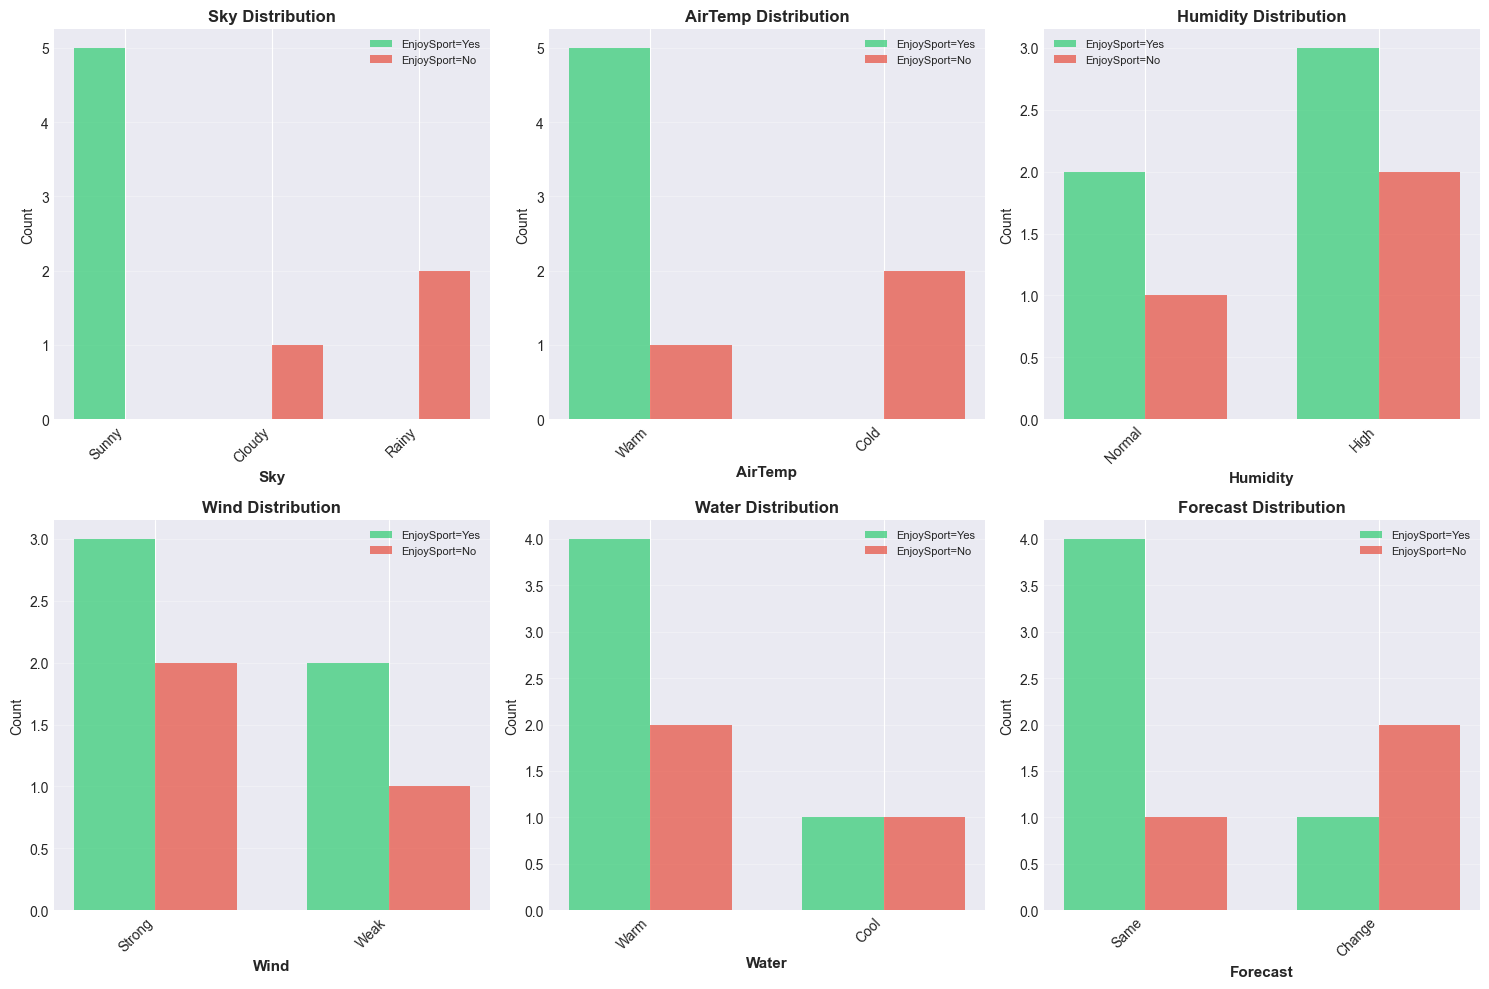


🎯 The Challenge: Can you predict if Aldo will enjoy water sports on a new day?
   We need to learn a hypothesis that generalizes from these examples!


In [22]:
# Load EnjoySport dataset
print_section_header("Concept Learning: EnjoySport Dataset", "🌊")

print("Please choose enjoysport_dataset.json dataset")
enjoysport_data = load_json_data('data/enjoysport_dataset.json')

print("📊 Dataset Description:")
print(f"   {enjoysport_data['description']}\n")

print("🔍 Attributes (Features):")
for attr, values in enjoysport_data['attributes'].items():
    print(f"   • {attr}: {values}")

# Convert to DataFrame
train_enjoysport = pd.DataFrame(enjoysport_data['training_data'])
test_enjoysport = pd.DataFrame(enjoysport_data['test_data'])

print(f"\n📈 Training Examples: {len(train_enjoysport)}")
print(f"📈 Test Examples: {len(test_enjoysport)}\n")

# Display training data
print("📋 Training Data:\n")
display_cols = ['example_id', 'Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'EnjoySport']
print(train_enjoysport[display_cols].to_string(index=False))

# Visualize the data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

attributes = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
colors_map = {'Yes': '#2ecc71', 'No': '#e74c3c'}

for idx, attr in enumerate(attributes):
    ax = axes[idx]

    # Count occurrences for each value
    yes_data = train_enjoysport[train_enjoysport['EnjoySport'] == 'Yes'][attr].value_counts()
    no_data = train_enjoysport[train_enjoysport['EnjoySport'] == 'No'][attr].value_counts()

    # Create grouped bar chart
    x = np.arange(len(enjoysport_data['attributes'][attr]))
    width = 0.35

    yes_counts = [yes_data.get(val, 0) for val in enjoysport_data['attributes'][attr]]
    no_counts = [no_data.get(val, 0) for val in enjoysport_data['attributes'][attr]]

    ax.bar(x - width/2, yes_counts, width, label='EnjoySport=Yes', color='#2ecc71', alpha=0.7)
    ax.bar(x + width/2, no_counts, width, label='EnjoySport=No', color='#e74c3c', alpha=0.7)

    ax.set_xlabel(attr, fontsize=11, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(f'{attr} Distribution', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(enjoysport_data['attributes'][attr], rotation=45, ha='right')
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 The Challenge: Can you predict if Aldo will enjoy water sports on a new day?")
print("   We need to learn a hypothesis that generalizes from these examples!")

---

## 📝 Slide 11: Hypothesis Representation

### Describing Concepts with Constraints

In concept learning, a **hypothesis** represents a possible concept that explains the training examples.  
Hypotheses are often expressed as **conjunctions of constraints** on each attribute.

**Three Types of Constraints:**

1. **"?" (Any value)**  
   - The attribute can take **any value**.  
   - It imposes **no restriction** on that attribute.  

2. **Specific value**  
   - The attribute must match a **particular value** exactly.  
   - Example: `"Warm"` means only instances with AirTemp = Warm satisfy the constraint.  

3. **"∅" (No value / Null)**  
   - This represents an **impossible constraint**.  
   - No instance can satisfy this attribute, making the hypothesis **very specific**.  


### Examples of Hypotheses

- **h₁ = ⟨Sunny, ?, ?, Strong, ?, ?⟩**  
  - Meaning: Sky must be Sunny **AND** Wind must be Strong.  
  - All other attributes are irrelevant (`?`), so they can take any value.  

- **h₂ = ⟨?, Warm, Normal, Strong, Warm, Same⟩**  
  - Meaning: All specified attributes must match exactly.  
  - This is more specific than h₁ because more constraints are applied.  

- **Most General Hypothesis:** ⟨?, ?, ?, ?, ?, ?⟩  
  - No constraints on any attribute.  
  - Accepts **all instances** as positive.  

- **Most Specific Hypothesis:** ⟨∅, ∅, ∅, ∅, ∅, ∅⟩  
  - Cannot be satisfied by any instance.  
  - Accepts **no instances** as positive.  


### Key Takeaways

- Hypotheses define the **search space** for learning.  
- Learning involves moving from the **most specific** to the **most general** hypothesis (or vice versa) based on examples.  
- Constraints allow us to **generalize or specialize** hypotheses systematically.  
- Understanding hypothesis representation is crucial for algorithms like **Find-S** and **Candidate Elimination**.


In [23]:
# Hypothesis representation and matching
print_section_header("Hypothesis Representation", "📝")

class Hypothesis:
    """Represents a hypothesis as a list of attribute constraints"""

    def __init__(self, constraints):
        """
        Initialize hypothesis with constraints.

        Args:
            constraints: List of constraints, one per attribute
                        '?' = any value
                        '∅' = no value (empty set)
                        specific value = must match exactly
        """
        self.constraints = constraints

    def matches(self, example):
        """
        Check if hypothesis matches (classifies as positive) an example.

        Args:
            example: Dictionary with attribute values

        Returns:
            True if hypothesis matches, False otherwise
        """
        attr_names = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']

        for i, attr_name in enumerate(attr_names):
            constraint = self.constraints[i]

            # Empty set constraint - never matches
            if constraint == '∅':
                return False

            # '?' matches any value
            if constraint == '?':
                continue

            # Specific value must match exactly
            if constraint != example[attr_name]:
                return False

        return True

    def is_more_general_than(self, other):
        """
        Check if this hypothesis is more general than another.
        h1 >= h2 if h1 classifies all instances that h2 classifies as positive.
        """
        for i in range(len(self.constraints)):
            c1, c2 = self.constraints[i], other.constraints[i]

            # If c1 is specific and c2 is '?', c1 is not more general
            if c1 != '?' and c2 == '?':
                return False

            # If c1 is '∅' and c2 is not, c1 is not more general
            if c1 == '∅' and c2 != '∅':
                return False

            # If c1 and c2 are both specific but different, c1 is not more general
            if c1 != '?' and c2 != '?' and c1 != '∅' and c2 != '∅' and c1 != c2:
                return False

        return True

    def __str__(self):
        return '⟨' + ', '.join(self.constraints) + '⟩'

    def __repr__(self):
        return self.__str__()

# Example hypotheses
h1 = Hypothesis(['Sunny', '?', '?', 'Strong', '?', '?'])
h2 = Hypothesis(['Sunny', 'Warm', '?', 'Strong', '?', '?'])
h3 = Hypothesis(['?', '?', '?', '?', '?', '?'])  # Most general
h4 = Hypothesis(['∅', '∅', '∅', '∅', '∅', '∅'])  # Most specific

print("📋 Example Hypotheses:\n")
print(f"h1 = {h1}")
print(f"   Interpretation: Sky=Sunny AND Wind=Strong (other attributes don't matter)\n")

print(f"h2 = {h2}")
print(f"   Interpretation: Sky=Sunny AND AirTemp=Warm AND Wind=Strong\n")

print(f"h3 = {h3}")
print(f"   Interpretation: Most General Hypothesis (all instances positive)\n")

print(f"h4 = {h4}")
print(f"   Interpretation: Most Specific Hypothesis (all instances negative)\n")

# Test hypothesis matching
test_example = train_enjoysport.iloc[0].to_dict()

print(f"\n🧪 Testing Hypotheses on Example 1:")
print(f"   Example: Sky={test_example['Sky']}, AirTemp={test_example['AirTemp']}, "
      f"Humidity={test_example['Humidity']}, Wind={test_example['Wind']}, "
      f"Water={test_example['Water']}, Forecast={test_example['Forecast']}")
print(f"   Actual Label: {test_example['EnjoySport']}\n")

print(f"   h1 {h1} matches? {h1.matches(test_example)}")
print(f"   h2 {h2} matches? {h2.matches(test_example)}")
print(f"   h3 {h3} matches? {h3.matches(test_example)}")
print(f"   h4 {h4} matches? {h4.matches(test_example)}")

# Test general-to-specific ordering
print(f"\n📊 General-to-Specific Ordering:\n")
print(f"   h3 {h3} is more general than h1 {h1}? {h3.is_more_general_than(h1)}")
print(f"   h1 {h1} is more general than h2 {h2}? {h1.is_more_general_than(h2)}")
print(f"   h2 {h2} is more general than h4 {h4}? {h2.is_more_general_than(h4)}")


📝 Hypothesis Representation

📋 Example Hypotheses:

h1 = ⟨Sunny, ?, ?, Strong, ?, ?⟩
   Interpretation: Sky=Sunny AND Wind=Strong (other attributes don't matter)

h2 = ⟨Sunny, Warm, ?, Strong, ?, ?⟩
   Interpretation: Sky=Sunny AND AirTemp=Warm AND Wind=Strong

h3 = ⟨?, ?, ?, ?, ?, ?⟩
   Interpretation: Most General Hypothesis (all instances positive)

h4 = ⟨∅, ∅, ∅, ∅, ∅, ∅⟩
   Interpretation: Most Specific Hypothesis (all instances negative)


🧪 Testing Hypotheses on Example 1:
   Example: Sky=Sunny, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Warm, Forecast=Same
   Actual Label: Yes

   h1 ⟨Sunny, ?, ?, Strong, ?, ?⟩ matches? True
   h2 ⟨Sunny, Warm, ?, Strong, ?, ?⟩ matches? True
   h3 ⟨?, ?, ?, ?, ?, ?⟩ matches? True
   h4 ⟨∅, ∅, ∅, ∅, ∅, ∅⟩ matches? False

📊 General-to-Specific Ordering:

   h3 ⟨?, ?, ?, ?, ?, ?⟩ is more general than h1 ⟨Sunny, ?, ?, Strong, ?, ?⟩? True
   h1 ⟨Sunny, ?, ?, Strong, ?, ?⟩ is more general than h2 ⟨Sunny, Warm, ?, Strong, ?, ?⟩? True
   h2 ⟨Su

---

# Part 5: The Find-S Algorithm

## 🔍 Slide 13-14: Find-S Algorithm

### What is Find-S?

The Find-S algorithm maintains a single hypothesis that represents the most specific generalization of all positive examples seen so far. It ignores negative examples and focuses solely on positive instances.

### Key Characteristics:

- **Single Hypothesis:** Maintains only one hypothesis at a time
- **Positive Examples Only:** Uses only positive training examples
- **Most Specific:** Always keeps the most restrictive hypothesis possible
- **Deterministic:** Given the same training data, always produces the same result

## How Find-S Works

### Step-by-Step Process:

1. **Initialize:** Start with the most specific hypothesis possible
2. **For each positive example:**
    - If the current hypothesis is **too specific** (doesn't cover the example), generalize it minimally
    - If the hypothesis already covers the example, keep it unchanged
3. **Ignore negative examples** completely
4. **Output:** The final hypothesis after processing all positive examples

### Generalization Rules:

- **Specific attribute value** → **More general value** (if needed)
- **Specific value** → **"?" (any value)** (if attributes differ)
- **Never make hypothesis more specific** (only generalize)

## Example: Learning "Good Day for Tennis"

Let's apply Find-S to learn when conditions are suitable for playing tennis.

### Training Data:

| Example | Sky | Air Temp | Humidity | Wind | Water | Forecast | Target |
|---------|-----|----------|----------|------|-------|----------|--------|
| 1 | Sunny | Warm | Normal | Strong | Warm | Same | **Yes** |
| 2 | Sunny | Warm | High | Strong | Warm | Same | **Yes** |
| 3 | Rainy | Cold | High | Strong | Warm | Change | No |
| 4 | Sunny | Warm | High | Light | Cool | Change | **Yes** |

### Find-S Execution:

**Initial Hypothesis:**
```
h = <∅, ∅, ∅, ∅, ∅, ∅>  (most specific - covers nothing)
```

**After Example 1** (Sunny, Warm, Normal, Strong, Warm, Same → Yes):
```
h = <Sunny, Warm, Normal, Strong, Warm, Same>
```

**After Example 2** (Sunny, Warm, High, Strong, Warm, Same → Yes):
- Humidity differs (Normal vs High) → Generalize to "?"
```
h = <Sunny, Warm, ?, Strong, Warm, Same>
```

**Skip Example 3** (Negative example - ignored by Find-S)

**After Example 4** (Sunny, Warm, High, Light, Cool, Change → Yes):
- Wind differs (Strong vs Light) → Generalize to "?"
- Water differs (Warm vs Cool) → Generalize to "?"
- Forecast differs (Same vs Change) → Generalize to "?"
```
h = <Sunny, Warm, ?, ?, ?, ?>
```

**Final Hypothesis:**
"Play tennis when Sky=Sunny AND Air Temp=Warm"

## Applying Find-S to Our Spam Detection Example

Let's demonstrate Find-S using our email spam data, focusing only on positive examples (spam emails):

### Positive Examples (Spam):
1. "Buy now! Limited time offer! Click here!" → Spam
2. "FREE MONEY! Act now! No questions asked!" → Spam  
3. "URGENT! You've won $1000000! Claim now!" → Spam
4. "Discount pills! No prescription needed!" → Spam

### Find-S Process for Spam Detection:

**Initial Hypothesis:**
```
h = <∅> (most specific - no emails are spam)
```

**After Example 1:** "Buy now! Limited time offer! Click here!"
```
h = <contains: "buy", "now", "!", "limited", "time", "offer", "click", "here">
```

**After Example 2:** "FREE MONEY! Act now! No questions asked!"
- Only "now" appears in both → Generalize
```
h = <contains: "now", "!">  (exclamation marks are common)
```

**After Example 3:** "URGENT! You've won $1000000! Claim now!"
- "now" and "!" still present → Keep these features
```
h = <contains: "now", "!", uppercase_words>
```

**After Example 4:** "Discount pills! No prescription needed!"
- Only "!" remains common → Further generalize
```
h = <contains: "!">
```

**Final Find-S Hypothesis:**
"Emails containing exclamation marks are spam"



## Advantages of Find-S

1. **Simplicity:** Easy to understand and implement
2. **Efficiency:** Linear time complexity O(n) where n is number of positive examples
3. **Guaranteed Consistency:** Always produces hypothesis consistent with positive examples
4. **Memory Efficient:** Stores only one hypothesis

## Limitations of Find-S

1. **Ignores Negative Examples:** Cannot learn from what something is NOT
2. **No Noise Handling:** Sensitive to inconsistent or mislabeled data
3. **Overfitting Risk:** May be too specific and fail to generalize
4. **Single Hypothesis:** Doesn't consider alternative valid hypotheses
5. **Conjunction Only:** Cannot learn disjunctive concepts (OR relationships)
    - Find-S can only learn concepts that are **AND** combinations of features
    - Cannot handle **OR** rules like "Play tennis if (Sky=Sunny OR Sky=Cloudy) AND Temp=Warm"
    - Struggles with concepts requiring multiple alternative conditions

## Comparison with Our Spam Classifier

Our Naive Bayes spam classifier differs from Find-S in several ways:

| Aspect | Find-S | Naive Bayes |
|--------|--------|-------------|
| **Negative Examples** | Ignores them | Uses them for learning |
| **Probabilistic** | No | Yes |
| **Multiple Features** | Conjunctive only | Can handle complex patterns |
| **Noise Handling** | Poor | Better (probabilistic) |
| **Generalization** | May be too specific | Better balance |

## Why is it Called "Find-S"?

The algorithm is called **"Find-S"** because it finds the **most Specific hypothesis** that is consistent with all positive training examples. The "S" stands for **"Specific"**.

### Etymology and Reasoning:

**"S" = Specific**
- The algorithm maintains the **most specific** (restrictive) hypothesis possible
- It only generalizes when forced to by new positive examples
- It never makes the hypothesis more specific, only more general

**"Find" = Search Process**
- The algorithm **searches** through the hypothesis space
- It **finds** the maximally specific hypothesis that covers all positive examples
- It's a systematic search strategy from specific to general

### Contrast with Other Approaches:

- **Find-G** would find the most **General** hypothesis (covers everything)
- **Find-S** finds the most **Specific** hypothesis (covers only what's necessary)

### Why "Most Specific" Matters:

1. **Minimal Generalization:** Only generalizes attributes when absolutely necessary
2. **Conservative Learning:** Avoids overgeneralization that could include negative examples
3. **Precise Boundaries:** Creates tight boundaries around the positive concept space
4. **Interpretability:** Specific hypotheses are often easier to understand and explain

The name reflects the algorithm's core philosophy: **be as specific as possible while still covering all positive training examples**.


## When to Use Find-S

Find-S is suitable when:
- You have reliable positive examples
- The target concept is conjunctive (AND relationships)
- You need a simple, interpretable rule
- Computational resources are limited
- The domain has minimal noise

## Extending Find-S

To address its limitations, Find-S can be extended:
- **Candidate Elimination:** Maintain both specific and general boundaries
- **Version Spaces:** Consider all consistent hypotheses
- **Noise Handling:** Add probabilistic elements
- **Negative Examples:** Incorporate techniques to use negative instances

Find-S provides a foundational understanding of how concept learning algorithms search through hypothesis space, even though more sophisticated algorithms are typically used in practice for real-world applications like our spam detection system.

In [28]:
# Implement Find-S Algorithm
print_section_header("Find-S Algorithm Implementation", "🔍")

def find_s_algorithm(training_data, attribute_names):
    """
    Find-S algorithm: Find the maximally specific hypothesis.

    Args:
        training_data: List of training examples (dictionaries)
        attribute_names: List of attribute names

    Returns:
        Hypothesis object representing the learned hypothesis
        List of hypothesis evolution steps
    """
    # Initialize to most specific hypothesis
    h = ['∅'] * len(attribute_names)
    history = []

    print("🚀 Starting Find-S Algorithm...\n")
    print(f"Initial hypothesis h0 = ⟨{', '.join(h)}⟩\n")
    history.append({
        'step': 0,
        'example': 'Initial',
        'hypothesis': h.copy(),
        'action': 'Initialize to most specific'
    })

    step = 1
    for example in training_data:
        # Only process positive examples
        if example['EnjoySport'] == 'Yes':
            print(f"📝 Processing Example {example['example_id']} (Positive):")
            print(f"   {', '.join([f'{attr}={example[attr]}' for attr in attribute_names])}")

            changes = []
            for i, attr in enumerate(attribute_names):
                # If constraint is '∅', replace with example value
                if h[i] == '∅':
                    h[i] = example[attr]
                    changes.append(f"{attr}: ∅ → {example[attr]}")
                # If constraint doesn't match, generalize to '?'
                elif h[i] != example[attr]:
                    old_val = h[i]
                    h[i] = '?'
                    changes.append(f"{attr}: {old_val} → ?")

            if changes:
                print(f"   Changes: {', '.join(changes)}")
            else:
                print(f"   No changes (hypothesis already covers this example)")

            print(f"   h{step} = ⟨{', '.join(h)}⟩\n")

            history.append({
                'step': step,
                'example': f"Example {example['example_id']} (+)",
                'hypothesis': h.copy(),
                'action': ', '.join(changes) if changes else 'No change'
            })
            step += 1
        else:
            print(f"⏭️  Skipping Example {example['example_id']} (Negative) - Find-S ignores negatives\n")

    return Hypothesis(h), history

# Run Find-S on EnjoySport data
attr_names = ['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']
final_hypothesis, evolution = find_s_algorithm(enjoysport_data['training_data'], attr_names)

print("="*80)
print(f"✅ Final Hypothesis: {final_hypothesis}")
print("="*80)
print("\n📊 Interpretation:")
for i, attr in enumerate(attr_names):
    constraint = final_hypothesis.constraints[i]
    if constraint == '?':
        print(f"   • {attr}: Any value (doesn't matter)")
    elif constraint == '∅':
        print(f"   • {attr}: No value (impossible)")
    else:
        print(f"   • {attr}: Must be '{constraint}'")

# Visualize hypothesis evolution
evolution_df = pd.DataFrame(evolution)
print("\n📈 Hypothesis Evolution:\n")
for _, row in evolution_df.iterrows():
    h_str = '⟨' + ', '.join(row['hypothesis']) + '⟩'
    print(f"Step {row['step']}: {row['example']:20s} → {h_str:40s} | {row['action']}")


🔍 Find-S Algorithm Implementation

🚀 Starting Find-S Algorithm...

Initial hypothesis h0 = ⟨∅, ∅, ∅, ∅, ∅, ∅⟩

📝 Processing Example 1 (Positive):
   Sky=Sunny, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Warm, Forecast=Same
   Changes: Sky: ∅ → Sunny, AirTemp: ∅ → Warm, Humidity: ∅ → Normal, Wind: ∅ → Strong, Water: ∅ → Warm, Forecast: ∅ → Same
   h1 = ⟨Sunny, Warm, Normal, Strong, Warm, Same⟩

📝 Processing Example 2 (Positive):
   Sky=Sunny, AirTemp=Warm, Humidity=High, Wind=Strong, Water=Warm, Forecast=Same
   Changes: Humidity: Normal → ?
   h2 = ⟨Sunny, Warm, ?, Strong, Warm, Same⟩

⏭️  Skipping Example 3 (Negative) - Find-S ignores negatives

📝 Processing Example 4 (Positive):
   Sky=Sunny, AirTemp=Warm, Humidity=High, Wind=Strong, Water=Cool, Forecast=Change
   Changes: Humidity: ? → ?, Water: Warm → ?, Forecast: Same → ?
   h3 = ⟨Sunny, Warm, ?, Strong, ?, ?⟩

📝 Processing Example 5 (Positive):
   Sky=Sunny, AirTemp=Warm, Humidity=Normal, Wind=Weak, Water=Warm, Forecast=S


🧪 Testing Find-S Hypothesis

Learned Hypothesis: ⟨Sunny, Warm, ?, ?, ?, ?⟩

📊 Performance on Training Data:

Example 1: Predicted=Yes, Actual=Yes ✓
Example 2: Predicted=Yes, Actual=Yes ✓
Example 3: Predicted=No , Actual=No  ✓
Example 4: Predicted=Yes, Actual=Yes ✓
Example 5: Predicted=Yes, Actual=Yes ✓
Example 6: Predicted=No , Actual=No  ✓
Example 7: Predicted=Yes, Actual=Yes ✓
Example 8: Predicted=No , Actual=No  ✓

📈 Training Accuracy: 8/8 = 100.0%

🔮 Predictions on Test Data:

Example 9:
   Sky=Sunny, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Cool, Forecast=Same
   Prediction: EnjoySport = Yes

Example 10:
   Sky=Cloudy, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Warm, Forecast=Same
   Prediction: EnjoySport = No

Example 11:
   Sky=Rainy, AirTemp=Cold, Humidity=Normal, Wind=Weak, Water=Cool, Forecast=Change
   Prediction: EnjoySport = No

Example 12:
   Sky=Sunny, AirTemp=Cold, Humidity=High, Wind=Strong, Water=Warm, Forecast=Same
   Prediction: EnjoySport = No

Ex

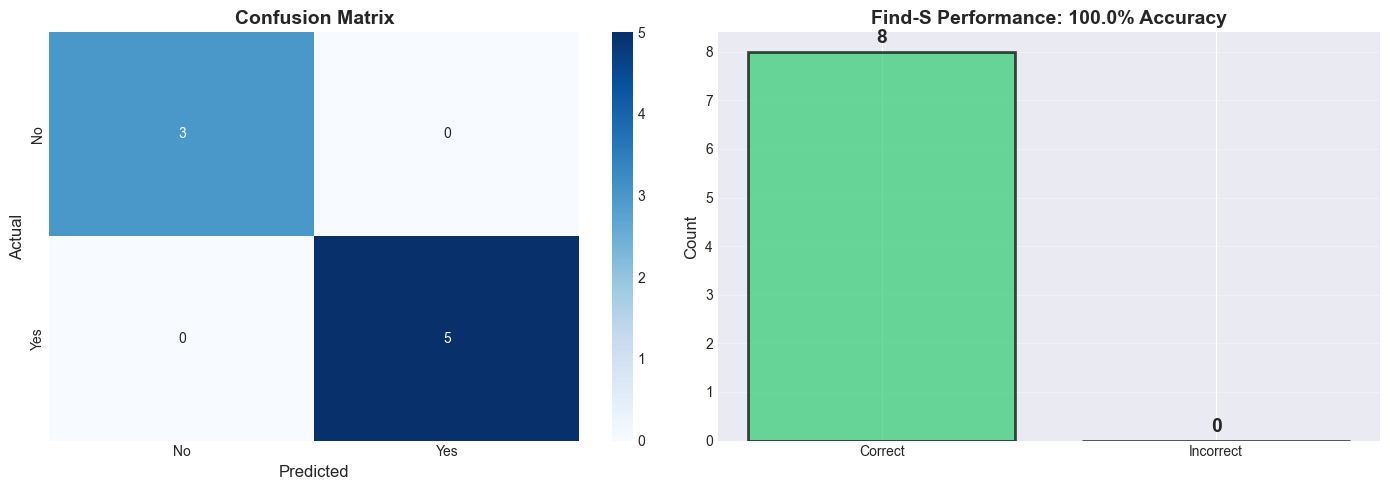


⚠️  Limitations of Find-S:
   1. Ignores negative examples (can't detect when hypothesis is too general)
   2. No way to know if we've converged to the correct concept
   3. Can't handle inconsistent data (noise/errors)
   4. Only finds ONE hypothesis (what if there are multiple valid ones?)

💡 Solution: Version Spaces and Candidate-Elimination Algorithm!


In [29]:
# Test the learned hypothesis
print_section_header("Testing Find-S Hypothesis", "🧪")

print(f"Learned Hypothesis: {final_hypothesis}\n")

# Test on training data
print("📊 Performance on Training Data:\n")
correct = 0
total = 0

for example in enjoysport_data['training_data']:
    prediction = 'Yes' if final_hypothesis.matches(example) else 'No'
    actual = example['EnjoySport']
    match = '✓' if prediction == actual else '✗'

    print(f"Example {example['example_id']}: Predicted={prediction:3s}, Actual={actual:3s} {match}")

    if prediction == actual:
        correct += 1
    total += 1

accuracy = (correct / total) * 100
print(f"\n📈 Training Accuracy: {correct}/{total} = {accuracy:.1f}%")

# Test on test data
print("\n🔮 Predictions on Test Data:\n")
for example in enjoysport_data['test_data']:
    prediction = 'Yes' if final_hypothesis.matches(example) else 'No'

    print(f"Example {example['example_id']}:")
    print(f"   {', '.join([f'{attr}={example[attr]}' for attr in attr_names])}")
    print(f"   Prediction: EnjoySport = {prediction}\n")

# Visualize predictions
train_results = []
for example in enjoysport_data['training_data']:
    prediction = 'Yes' if final_hypothesis.matches(example) else 'No'
    actual = example['EnjoySport']
    train_results.append({
        'Example': example['example_id'],
        'Predicted': prediction,
        'Actual': actual,
        'Correct': prediction == actual
    })

results_df = pd.DataFrame(train_results)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(results_df['Actual'], results_df['Predicted'], labels=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# Accuracy visualization
correct_count = results_df['Correct'].sum()
incorrect_count = len(results_df) - correct_count

axes[1].bar(['Correct', 'Incorrect'], [correct_count, incorrect_count],
            color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title(f'Find-S Performance: {accuracy:.1f}% Accuracy', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate([correct_count, incorrect_count]):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⚠️  Limitations of Find-S:")
print("   1. Ignores negative examples (can't detect when hypothesis is too general)")
print("   2. No way to know if we've converged to the correct concept")
print("   3. Can't handle inconsistent data (noise/errors)")
print("   4. Only finds ONE hypothesis (what if there are multiple valid ones?)")
print("\n💡 Solution: Version Spaces and Candidate-Elimination Algorithm!")

---

# Part 6: Version Spaces and Candidate-Elimination

## 🎯 Slide 15-16: Version Spaces

### What is a Version Space?

A **Version Space** is the set of all hypotheses that are consistent with the observed training examples. It represents all possible concepts that could explain the data we've seen so far.

**Formal Definition:**
Given a hypothesis space H and a set of training examples D, the version space VS(H,D) is:
```
VS(H,D) = {h ∈ H | h is consistent with D}
```

**Key Properties:**
- Contains all valid hypotheses that correctly classify all training examples
- Shrinks as more training examples are observed
- Represents the uncertainty remaining about the target concept
- When version space contains only one hypothesis, learning is complete

### Understanding Version Spaces with an Example

Consider learning "Good Weather for Outdoor Wedding" with attributes:
- **Temperature:** {Hot, Mild, Cool}
- **Wind:** {Strong, Weak}  
- **Humidity:** {High, Normal}

**Initial Version Space:** All possible hypotheses (very large)

**After seeing positive example:** (Mild, Weak, Normal) → Yes
- Version space narrows to hypotheses that include this combination

**After seeing negative example:** (Hot, Strong, High) → No  
- Version space further narrows, excluding hypotheses that would classify this as positive

### The Candidate-Elimination Algorithm

The **Candidate-Elimination Algorithm** efficiently represents the version space using two boundaries:

#### 1. **Specific Boundary (S)**
- Most **specific** hypotheses in the version space
- Represents the minimally general hypotheses that cover all positive examples
- Cannot be made more specific without excluding positive examples

#### 2. **General Boundary (G)**  
- Most **general** hypotheses in the version space
- Represents the maximally general hypotheses that exclude all negative examples
- Cannot be made more general without including negative examples

### Algorithm Steps

```
1. Initialize:
    S ← most specific hypothesis in H
    G ← most general hypothesis in H

2. For each training example (x, c(x)):
    
    If c(x) = positive:
    - Remove from G any hypothesis inconsistent with (x, positive)
    - For each hypothesis s in S inconsistent with (x, positive):
      * Remove s from S
      * Add minimal generalizations of s consistent with (x, positive)
      * Remove any hypothesis more general than another in S
    
    If c(x) = negative:
    - Remove from S any hypothesis inconsistent with (x, negative)  
    - For each hypothesis g in G inconsistent with (x, negative):
      * Remove g from G
      * Add minimal specializations of g consistent with (x, negative)
      * Remove any hypothesis more specific than another in G

3. Version Space = all hypotheses h such that some s ∈ S is more general than h, 
    and h is more general than some g ∈ G
```

### Example: Learning "Spam Email" Concept

Let's apply Candidate-Elimination to learn spam detection using simplified features:

**Attributes:**
- **Urgency:** {High, Low, None}
- **Money:** {Mentioned, Not-Mentioned}
- **Sender:** {Unknown, Known}

#### Training Examples:

| Email Content | Urgency | Money | Sender | Spam? |
|---------------|---------|-------|--------|-------|
| "URGENT! Win money now!" | High | Mentioned | Unknown | **Yes** |
| "Meeting tomorrow at 3pm" | None | Not-Mentioned | Known | **No** |
| "Limited offer! Save $$$" | Low | Mentioned | Unknown | **Yes** |
| "Thanks for your help" | None | Not-Mentioned | Known | **No** |

#### Step-by-Step Execution:

**Initial State:**
```
S = {<∅, ∅, ∅>}  (most specific - covers nothing)
G = {<?, ?, ?>}   (most general - covers everything)
```

**After Example 1:** (High, Mentioned, Unknown) → **Positive**
```
S = {<High, Mentioned, Unknown>}  (generalize S to cover this example)
G = {<?, ?, ?>}                   (G unchanged - still consistent)
```

**After Example 2:** (None, Not-Mentioned, Known) → **Negative**
```
S = {<High, Mentioned, Unknown>}  (S unchanged - already excludes this)
G = {<High, ?, ?>, <?, Mentioned, ?>, <?, ?, Unknown>}  (specialize G to exclude this)
```

**After Example 3:** (Low, Mentioned, Unknown) → **Positive**
```
S = {<?, Mentioned, Unknown>}     (generalize S: High→? to cover both positives)
G = {<?, Mentioned, ?>, <?, ?, Unknown>}  (remove inconsistent hypotheses)
```

**After Example 4:** (None, Not-Mentioned, Known) → **Negative**
```
S = {<?, Mentioned, Unknown>}     (S unchanged)
G = {<?, Mentioned, Unknown>}     (G converges to S)
```

**Final Version Space:**
```
Learned Concept: "Emails that mention money AND come from unknown senders are spam"
```



### Advantages of Candidate-Elimination

1. **Complete Representation:** Captures all hypotheses consistent with data
2. **Incremental Learning:** Updates version space with each new example
3. **Uncertainty Quantification:** Size of version space indicates learning confidence
4. **Optimal Sample Complexity:** Minimizes number of examples needed

### Limitations

1. **Noise Sensitivity:** Single mislabeled example can corrupt entire version space
2. **Computational Complexity:** Version space can become exponentially large
3. **Representation Limitations:** Restricted to conjunctive concepts in basic form
4. **Empty Version Space:** Inconsistent data leads to no valid hypotheses

### Comparison with Our Naive Bayes Approach

| Aspect | Candidate-Elimination | Naive Bayes |
|--------|----------------------|-------------|
| **Noise Handling** | Poor (sensitive) | Good (probabilistic) |
| **Hypothesis Space** | Explicit boundaries | Implicit (probability distributions) |
| **Uncertainty** | Version space size | Prediction confidence |
| **Computational Cost** | Can be exponential | Linear/polynomial |
| **Interpretability** | Very high | Moderate |

### Real-World Applications

**Medical Diagnosis:**
- S boundary: Most specific symptoms that indicate disease
- G boundary: Most general symptoms that rule out disease
- Version space: All possible diagnostic criteria

**Financial Fraud Detection:**
- S boundary: Most specific transaction patterns indicating fraud
- G boundary: Most general patterns that exclude legitimate transactions
- Version space: All possible fraud detection rules

### Modern Extensions

1. **Probabilistic Version Spaces:** Handle noisy data with probability distributions
2. **Incremental Version Spaces:** Efficient updates for streaming data
3. **Kernel Version Spaces:** Extend to non-linear concept boundaries
4. **Ensemble Version Spaces:** Combine multiple version spaces for robustness

### Key Takeaways

1. **Version spaces represent all valid hypotheses** consistent with training data
2. **Candidate-Elimination efficiently maintains boundaries** of the version space
3. **The algorithm converges to the target concept** as more examples are seen
4. **Modern ML often uses probabilistic approaches** to handle noise and uncertainty
5. **Understanding version spaces helps in designing better learning algorithms** and interpreting their behavior

The version space framework provides crucial theoretical foundations for understanding how machine learning algorithms search through hypothesis spaces and converge on target concepts, even though practical implementations often use more robust probabilistic approaches like our Naive Bayes spam classifier.

In [30]:
# Implement Candidate-Elimination Algorithm
print_section_header("Candidate-Elimination Algorithm", "🎯")

class CandidateElimination:
    """Candidate-Elimination algorithm for concept learning"""

    def __init__(self, attribute_names, attribute_values):
        """
        Initialize with most general and most specific hypotheses.

        Args:
            attribute_names: List of attribute names
            attribute_values: Dictionary mapping attribute names to possible values
        """
        self.attribute_names = attribute_names
        self.attribute_values = attribute_values
        self.num_attributes = len(attribute_names)

        # Initialize S to most specific hypothesis
        self.S = [Hypothesis(['∅'] * self.num_attributes)]

        # Initialize G to most general hypothesis
        self.G = [Hypothesis(['?'] * self.num_attributes)]

        self.history = []

    def generalize_hypothesis(self, h, example):
        """
        Minimally generalize hypothesis h to cover example.
        """
        new_constraints = []
        for i, attr in enumerate(self.attribute_names):
            if h.constraints[i] == '∅':
                new_constraints.append(example[attr])
            elif h.constraints[i] != example[attr]:
                new_constraints.append('?')
            else:
                new_constraints.append(h.constraints[i])
        return Hypothesis(new_constraints)

    def specialize_hypothesis(self, h, example):
        """
        Minimally specialize hypothesis h to exclude example.
        Returns list of specialized hypotheses.
        """
        specialized = []

        for i, attr in enumerate(self.attribute_names):
            if h.constraints[i] == '?':
                # Try all possible values except the one in the example
                for value in self.attribute_values[attr]:
                    if value != example[attr]:
                        new_constraints = h.constraints.copy()
                        new_constraints[i] = value
                        specialized.append(Hypothesis(new_constraints))

        return specialized

    def train(self, training_data):
        """
        Train using Candidate-Elimination algorithm.
        """
        print("🚀 Starting Candidate-Elimination Algorithm...\n")
        print(f"Initial State:")
        print(f"  S = {{{', '.join([str(h) for h in self.S])}}}")
        print(f"  G = {{{', '.join([str(h) for h in self.G])}}}\n")

        self.history.append({
            'step': 0,
            'example': 'Initial',
            'S': [h.constraints.copy() for h in self.S],
            'G': [h.constraints.copy() for h in self.G]
        })

        for idx, example in enumerate(training_data):
            step = idx + 1
            label = example['EnjoySport']

            print(f"{'='*80}")
            print(f"📝 Step {step}: Processing Example {example['example_id']} ({label})")
            print(f"{'='*80}")
            print(f"   {', '.join([f'{attr}={example[attr]}' for attr in self.attribute_names])}\n")

            if label == 'Yes':
                # Positive example
                print("   ✅ Positive Example - Update S and G:\n")

                # Remove from G any hypothesis inconsistent with example
                self.G = [g for g in self.G if g.matches(example)]
                print(f"   1. Remove from G hypotheses that don't match")

                # Generalize S if needed
                new_S = []
                for s in self.S:
                    if not s.matches(example):
                        # Generalize s
                        s_new = self.generalize_hypothesis(s, example)
                        # Only keep if some member of G is more general
                        if any(g.is_more_general_than(s_new) for g in self.G):
                            new_S.append(s_new)
                        print(f"   2. Generalize S: {s} → {s_new}")
                    else:
                        new_S.append(s)

                # Remove from S any hypothesis more general than another in S
                self.S = []
                for s in new_S:
                    if not any(s != s2 and s.is_more_general_than(s2) for s2 in new_S):
                        self.S.append(s)

            else:
                # Negative example
                print("   ❌ Negative Example - Update G and S:\n")

                # Remove from S any hypothesis inconsistent with example
                self.S = [s for s in self.S if not s.matches(example)]
                print(f"   1. Remove from S hypotheses that match (should be none)")

                # Specialize G if needed
                new_G = []
                for g in self.G:
                    if g.matches(example):
                        # Specialize g
                        specialized = self.specialize_hypothesis(g, example)
                        print(f"   2. Specialize G: {g} →")
                        for spec in specialized:
                            # Only keep if some member of S is more specific
                            if any(spec.is_more_general_than(s) for s in self.S):
                                new_G.append(spec)
                                print(f"      {spec}")
                    else:
                        new_G.append(g)

                # Remove from G any hypothesis less general than another in G
                self.G = []
                for g in new_G:
                    if not any(g != g2 and g2.is_more_general_than(g) for g2 in new_G):
                        self.G.append(g)

            print(f"\n   Updated Version Space:")
            print(f"   S = {{{', '.join([str(h) for h in self.S])}}}")
            print(f"   G = {{{', '.join([str(h) for h in self.G])}}}\n")

            self.history.append({
                'step': step,
                'example': f"Example {example['example_id']} ({label})",
                'S': [h.constraints.copy() for h in self.S],
                'G': [h.constraints.copy() for h in self.G]
            })

        print("="*80)
        print("✅ Candidate-Elimination Complete!")
        print("="*80)
        print(f"\nFinal Version Space:")
        print(f"  S (Specific Boundary) = {{{', '.join([str(h) for h in self.S])}}}")
        print(f"  G (General Boundary) = {{{', '.join([str(h) for h in self.G])}}}")

# Run Candidate-Elimination
ce = CandidateElimination(attr_names, enjoysport_data['attributes'])
ce.train(enjoysport_data['training_data'])


🎯 Candidate-Elimination Algorithm

🚀 Starting Candidate-Elimination Algorithm...

Initial State:
  S = {⟨∅, ∅, ∅, ∅, ∅, ∅⟩}
  G = {⟨?, ?, ?, ?, ?, ?⟩}

📝 Step 1: Processing Example 1 (Yes)
   Sky=Sunny, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Warm, Forecast=Same

   ✅ Positive Example - Update S and G:

   1. Remove from G hypotheses that don't match
   2. Generalize S: ⟨∅, ∅, ∅, ∅, ∅, ∅⟩ → ⟨Sunny, Warm, Normal, Strong, Warm, Same⟩

   Updated Version Space:
   S = {⟨Sunny, Warm, Normal, Strong, Warm, Same⟩}
   G = {⟨?, ?, ?, ?, ?, ?⟩}

📝 Step 2: Processing Example 2 (Yes)
   Sky=Sunny, AirTemp=Warm, Humidity=High, Wind=Strong, Water=Warm, Forecast=Same

   ✅ Positive Example - Update S and G:

   1. Remove from G hypotheses that don't match
   2. Generalize S: ⟨Sunny, Warm, Normal, Strong, Warm, Same⟩ → ⟨Sunny, Warm, ?, Strong, Warm, Same⟩

   Updated Version Space:
   S = {⟨Sunny, Warm, ?, Strong, Warm, Same⟩}
   G = {⟨?, ?, ?, ?, ?, ?⟩}

📝 Step 3: Processing Example 3 (No


📊 Version Space Evolution Visualization



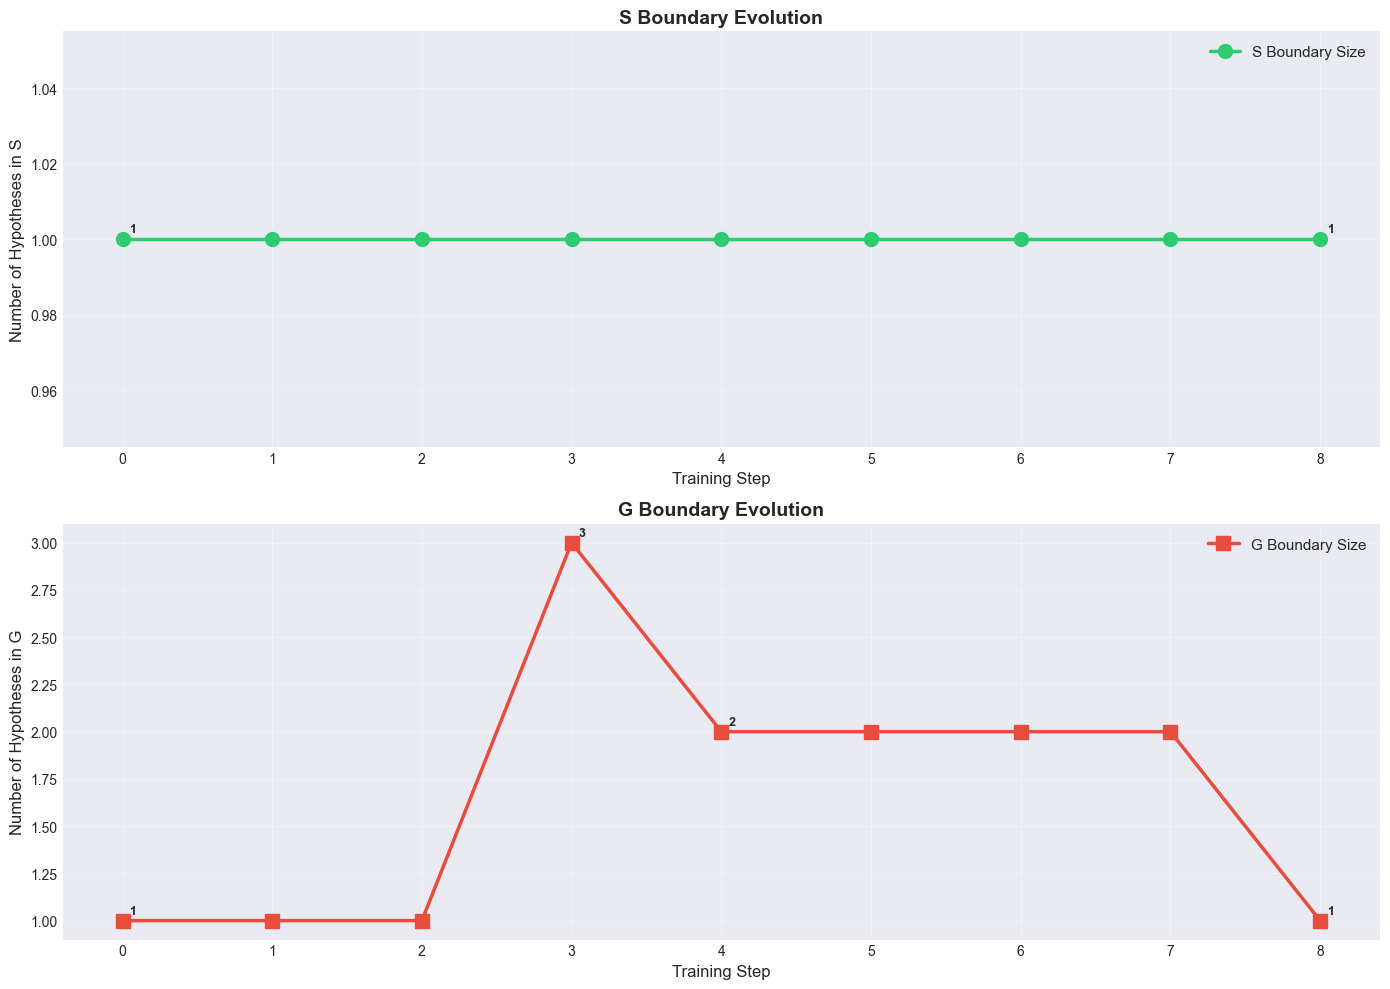


📋 Version Space Evolution Summary:

 Step         Example  |S|  |G|
    0         Initial    1    1
    1 Example 1 (Yes)    1    1
    2 Example 2 (Yes)    1    1
    3  Example 3 (No)    1    3
    4 Example 4 (Yes)    1    2
    5 Example 5 (Yes)    1    2
    6  Example 6 (No)    1    2
    7 Example 7 (Yes)    1    2
    8  Example 8 (No)    1    1

💡 Key Observations:
   • S boundary starts specific and becomes more general
   • G boundary starts general and becomes more specific
   • Version space size = all hypotheses between S and G
   • Converges when S = G (single hypothesis remains)


In [32]:
# Visualize Version Space Evolution
print_section_header("Version Space Evolution Visualization", "📊")

# Create visualization of S and G boundaries over time
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot S boundary evolution
ax1 = axes[0]
steps = [h['step'] for h in ce.history]
s_sizes = [len(h['S']) for h in ce.history]

ax1.plot(steps, s_sizes, marker='o', linewidth=2.5, markersize=10,
         color='#2ecc71', label='S Boundary Size')
ax1.set_xlabel('Training Step', fontsize=12)
ax1.set_ylabel('Number of Hypotheses in S', fontsize=12)
ax1.set_title('S Boundary Evolution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Annotate key points
for i, (step, size) in enumerate(zip(steps, s_sizes)):
    if i == 0 or i == len(steps) - 1 or (i > 0 and size != s_sizes[i-1]):
        ax1.annotate(f'{size}', xy=(step, size), xytext=(5, 5),
                    textcoords='offset points', fontsize=9, fontweight='bold')

# Plot G boundary evolution
ax2 = axes[1]
g_sizes = [len(h['G']) for h in ce.history]

ax2.plot(steps, g_sizes, marker='s', linewidth=2.5, markersize=10,
         color='#e74c3c', label='G Boundary Size')
ax2.set_xlabel('Training Step', fontsize=12)
ax2.set_ylabel('Number of Hypotheses in G', fontsize=12)
ax2.set_title('G Boundary Evolution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

# Annotate key points
for i, (step, size) in enumerate(zip(steps, g_sizes)):
    if i == 0 or i == len(steps) - 1 or (i > 0 and size != g_sizes[i-1]):
        ax2.annotate(f'{size}', xy=(step, size), xytext=(5, 5),
                    textcoords='offset points', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Display evolution table
print("\n📋 Version Space Evolution Summary:\n")
evolution_summary = []
for h in ce.history:
    s_str = ', '.join(['⟨' + ', '.join(s) + '⟩' for s in h['S']])
    g_str = ', '.join(['⟨' + ', '.join(g) + '⟩' for g in h['G']])
    evolution_summary.append({
        'Step': h['step'],
        'Example': h['example'],
        '|S|': len(h['S']),
        '|G|': len(h['G']),
        'S': s_str[:50] + '...' if len(s_str) > 50 else s_str,
        'G': g_str[:50] + '...' if len(g_str) > 50 else g_str
    })

evolution_df = pd.DataFrame(evolution_summary)
print(evolution_df[['Step', 'Example', '|S|', '|G|']].to_string(index=False))

print("\n💡 Key Observations:")
print("   • S boundary starts specific and becomes more general")
print("   • G boundary starts general and becomes more specific")
print("   • Version space size = all hypotheses between S and G")
print("   • Converges when S = G (single hypothesis remains)")


🧪 Testing Candidate-Elimination

Final Version Space:
  S = {⟨Sunny, Warm, ?, ?, ?, ?⟩}
  G = {⟨Sunny, ?, ?, ?, ?, ?⟩}

📊 Performance on Training Data:

Example 1: Predicted=Yes    , Actual=Yes ✓
Example 2: Predicted=Yes    , Actual=Yes ✓
Example 3: Predicted=No     , Actual=No  ✓
Example 4: Predicted=Yes    , Actual=Yes ✓
Example 5: Predicted=Yes    , Actual=Yes ✓
Example 6: Predicted=No     , Actual=No  ✓
Example 7: Predicted=Yes    , Actual=Yes ✓
Example 8: Predicted=No     , Actual=No  ✓

📈 Training Accuracy: 8/8 = 100.0%
   Unknown predictions: 0

🔮 Predictions on Test Data:

Example 9:
   Sky=Sunny, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Cool, Forecast=Same
   Prediction: EnjoySport = Yes
   S hypotheses that match: ['⟨Sunny, Warm, ?, ?, ?, ?⟩']
   G hypotheses that match: ['⟨Sunny, ?, ?, ?, ?, ?⟩']

Example 10:
   Sky=Cloudy, AirTemp=Warm, Humidity=Normal, Wind=Strong, Water=Warm, Forecast=Same
   Prediction: EnjoySport = No
   S hypotheses that match: None
   G hypo

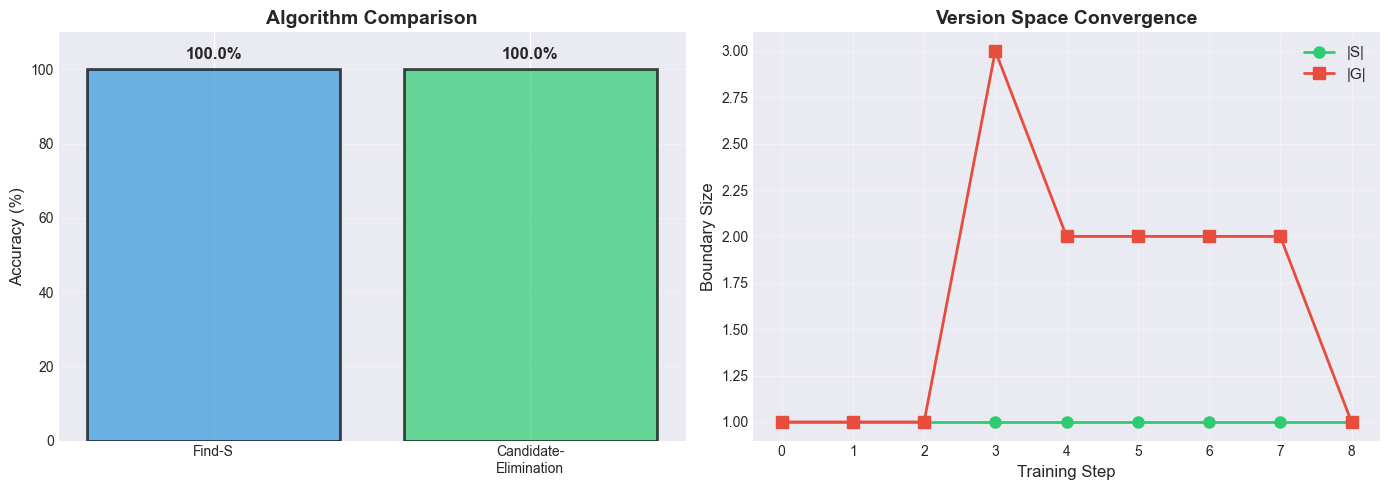


✅ Advantages of Candidate-Elimination over Find-S:
   1. Uses both positive AND negative examples
   2. Maintains ALL consistent hypotheses (via S and G boundaries)
   3. Can detect when more data is needed (Unknown predictions)
   4. Can detect inconsistent training data
   5. Provides confidence in predictions based on version space


In [34]:
# Test Candidate-Elimination predictions
print_section_header("Testing Candidate-Elimination", "🧪")

def classify_with_version_space(example, S, G):
    """
    Classify an example using version space.
    Returns: 'Yes', 'No', or 'Unknown'
    """
    # Check if all hypotheses in S match
    s_matches = [s.matches(example) for s in S]

    # Check if all hypotheses in G match
    g_matches = [g.matches(example) for g in G]

    if all(s_matches) and all(g_matches):
        return 'Yes'
    elif not any(g_matches):
        return 'No'
    else:
        return 'Unknown'

print(f"Final Version Space:")
print(f"  S = {{{', '.join([str(h) for h in ce.S])}}}")
print(f"  G = {{{', '.join([str(h) for h in ce.G])}}}\n")

# Test on training data
print("📊 Performance on Training Data:\n")
train_correct = 0
train_total = 0
train_unknown = 0

for example in enjoysport_data['training_data']:
    prediction = classify_with_version_space(example, ce.S, ce.G)
    actual = example['EnjoySport']

    if prediction == 'Unknown':
        match = '?'
        train_unknown += 1
    elif prediction == actual:
        match = '✓'
        train_correct += 1
    else:
        match = '✗'

    print(f"Example {example['example_id']}: Predicted={prediction:7s}, Actual={actual:3s} {match}")
    train_total += 1

train_accuracy = (train_correct / train_total) * 100
print(f"\n📈 Training Accuracy: {train_correct}/{train_total} = {train_accuracy:.1f}%")
print(f"   Unknown predictions: {train_unknown}")

# Test on test data
print("\n🔮 Predictions on Test Data:\n")
test_predictions = []

for example in enjoysport_data['test_data']:
    prediction = classify_with_version_space(example, ce.S, ce.G)

    print(f"Example {example['example_id']}:")
    print(f"   {', '.join([f'{attr}={example[attr]}' for attr in attr_names])}")
    print(f"   Prediction: EnjoySport = {prediction}")

    # Show which hypotheses match
    s_match = [str(s) for s in ce.S if s.matches(example)]
    g_match = [str(g) for g in ce.G if g.matches(example)]

    print(f"   S hypotheses that match: {s_match if s_match else 'None'}")
    print(f"   G hypotheses that match: {g_match if g_match else 'None'}\n")

    test_predictions.append({
        'Example': example['example_id'],
        'Prediction': prediction,
        'S_matches': len(s_match),
        'G_matches': len(g_match)
    })

# Visualize comparison: Find-S vs Candidate-Elimination
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Find-S accuracy
finds_acc = accuracy  # From previous Find-S test
ce_acc = train_accuracy

algorithms = ['Find-S', 'Candidate-\nElimination']
accuracies = [finds_acc, ce_acc]
colors_alg = ['#3498db', '#2ecc71']

axes[0].bar(algorithms, accuracies, color=colors_alg, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Algorithm Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 110)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(accuracies):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Version space size over time
axes[1].plot(steps, s_sizes, marker='o', linewidth=2, markersize=8,
             color='#2ecc71', label='|S|')
axes[1].plot(steps, g_sizes, marker='s', linewidth=2, markersize=8,
             color='#e74c3c', label='|G|')
axes[1].set_xlabel('Training Step', fontsize=12)
axes[1].set_ylabel('Boundary Size', fontsize=12)
axes[1].set_title('Version Space Convergence', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Advantages of Candidate-Elimination over Find-S:")
print("   1. Uses both positive AND negative examples")
print("   2. Maintains ALL consistent hypotheses (via S and G boundaries)")
print("   3. Can detect when more data is needed (Unknown predictions)")
print("   4. Can detect inconsistent training data")
print("   5. Provides confidence in predictions based on version space")

## Remarks on Version Spaces and Candidate-Elimination

Version spaces and the Candidate-Elimination algorithm represent a foundational approach to concept learning that provides important theoretical insights, though they have significant practical limitations when applied to real-world problems like our spam detection system.

### Theoretical Strengths

**Elegant Mathematical Framework**
- Provides a complete characterization of all hypotheses consistent with observed data
- Offers formal guarantees about learning convergence and sample complexity
- Demonstrates how the hypothesis space systematically narrows with each training example

**Interpretability and Explainability**
- The S and G boundaries provide clear, human-readable rules
- Easy to understand what the algorithm has learned and why
- Transparent decision-making process compared to black-box models

**Optimal Learning Efficiency**
- Achieves optimal sample complexity in noise-free environments
- Makes maximum use of each training example to reduce uncertainty
- Provides theoretical bounds on learning performance

### Practical Limitations

**Noise Sensitivity**
- A single mislabeled example can corrupt the entire version space
- Real-world data like our email dataset often contains labeling errors
- No mechanism to handle uncertainty or conflicting evidence

**Computational Complexity**
- Version spaces can grow exponentially large with attribute dimensions
- Maintaining exact boundaries becomes computationally prohibitive
- Our spam features (word frequencies) would create enormous hypothesis spaces

**Representational Constraints**
- Limited to conjunctive concepts (AND relationships only)
- Cannot learn disjunctive patterns ("spam if contains 'FREE' OR 'URGENT'")
- Modern problems require more flexible hypothesis representations

### Comparison with Our Naive Bayes Approach

**Handling Uncertainty**
- Candidate-Elimination: Binary decisions (consistent/inconsistent)
- Naive Bayes: Probabilistic confidence scores (achieved 67% accuracy with confidence measures)

**Noise Robustness**
- Candidate-Elimination: Fails completely with noisy data
- Naive Bayes: Gracefully handles mislabeled examples through probability averaging

**Feature Representation**
- Candidate-Elimination: Binary features only
- Naive Bayes: Can handle word frequencies, continuous values, and complex feature interactions

**Scalability**
- Candidate-Elimination: Exponential space complexity
- Naive Bayes: Linear space and time complexity, suitable for high-dimensional text data

### Modern Relevance and Extensions

**Theoretical Foundation**
- Provides conceptual framework for understanding how learning algorithms search hypothesis spaces
- Influences design of modern algorithms even when not directly implemented
- Helps analyze learning bounds and sample complexity

**Active Learning Applications**
- Version space uncertainty guides which examples to label next
- Minimizes labeling effort by focusing on most informative instances
- Useful in scenarios where obtaining labels is expensive

**Ensemble Methods**
- Multiple learners can approximate different regions of version space
- Voting schemes can capture version space consensus
- Provides principled approach to combining diverse hypotheses

### Lessons for Practical ML Systems

**Design Principles**
- Understand theoretical foundations while choosing practical algorithms
- Balance interpretability with performance requirements
- Consider noise handling capabilities when selecting methods

**Evaluation Insights**
- Version space size indicates model confidence and learning progress
- Empty version spaces signal inconsistent data requiring investigation
- Convergence patterns reveal dataset quality and concept complexity

**System Architecture**
- Use probabilistic methods for robustness in production systems
- Implement theoretical insights for debugging and model interpretation
- Combine multiple approaches to leverage both theoretical guarantees and practical performance

### Conclusion

While Candidate-Elimination is rarely used directly in modern applications due to its limitations, understanding version spaces provides crucial insights into the nature of machine learning. The theoretical framework helps us design better algorithms, interpret model behavior, and make informed decisions about appropriate methods for specific problems.

Our Naive Bayes spam classifier, though less theoretically elegant, demonstrates the practical trade-offs necessary for real-world applications: sacrificing perfect consistency for noise robustness, exact boundaries for probabilistic confidence, and complete interpretability for scalable performance.

---

# Part 7: Inductive Bias

## 🧬 Slide 19: Inductive Bias - The Necessity of Assumptions

### Why Learning Requires Bias

**The Fundamental Question:**  
Can a completely unbiased learner generalize to unseen instances based only on observed training data?  

**Answer:** **No.**  
- Without any assumptions about the data, the learner has no basis for predicting outputs for new inputs.  
- Learning always requires some form of **prior knowledge or bias** to guide generalization.


### What is Inductive Bias?

**Definition:**  
Inductive bias is the set of **assumptions a learning algorithm makes** to predict outputs for inputs it has **never seen before**.  

- It defines **what hypotheses are considered plausible**.  
- Different algorithms have different biases, which determine **how they generalize**.

### Example: Candidate-Elimination Algorithm

- **Bias:** "The target concept can be represented as a conjunction of attribute constraints."  
- **Implication:**  
  - The algorithm searches only within hypotheses that are conjunctions of attribute values.  
  - It ignores hypotheses that cannot be expressed in this form.  
  - This bias allows systematic generalization from positive and negative examples.

### Key Insights About Bias

1. **Stronger bias** → More assumptions about the target concept.  
   - Learner generalizes better **if assumptions are correct**.  
   - Risk: If assumptions are wrong, the learner may fail to find the correct concept.

2. **Weaker bias** → Fewer assumptions.  
   - More flexible but **less able to generalize**.  
   - Learner may consider too many hypotheses, slowing down learning.

3. **No bias** → No generalization possible.  
   - Learner cannot make predictions beyond the training data.  
   - All unseen instances are completely uncertain.


🧬 Inductive Bias Demonstration

🤔 The Futility of Bias-Free Learning

Scenario: Unbiased Learner with Power Set Hypothesis Space

Given 3 training examples:
  1. ⟨Sunny, Warm, Normal, Strong, Warm, Same⟩ → Yes
  2. ⟨Sunny, Warm, High, Strong, Warm, Same⟩ → Yes
  3. ⟨Rainy, Cold, High, Strong, Cool, Change⟩ → No

Question: Will ⟨Sunny, Warm, Normal, Weak, Warm, Same⟩ be positive?

With Power Set Hypothesis Space (no bias):
  • Hypothesis h1: Only examples 1 and 2 are positive → Predicts: No
  • Hypothesis h2: All examples with Sunny are positive → Predicts: Yes
  • Hypothesis h3: All examples except 3 are positive → Predicts: Yes
  • ... infinitely many hypotheses ...

Result: Exactly HALF of consistent hypotheses say Yes, half say No!
        → Cannot make a confident prediction!

With Candidate-Elimination Bias (conjunctive hypotheses):
  • Restricts to hypotheses like ⟨Sunny, Warm, ?, Strong, ?, ?⟩
  • Can make confident predictions on new examples
  • Trade-off: Might miss concepts

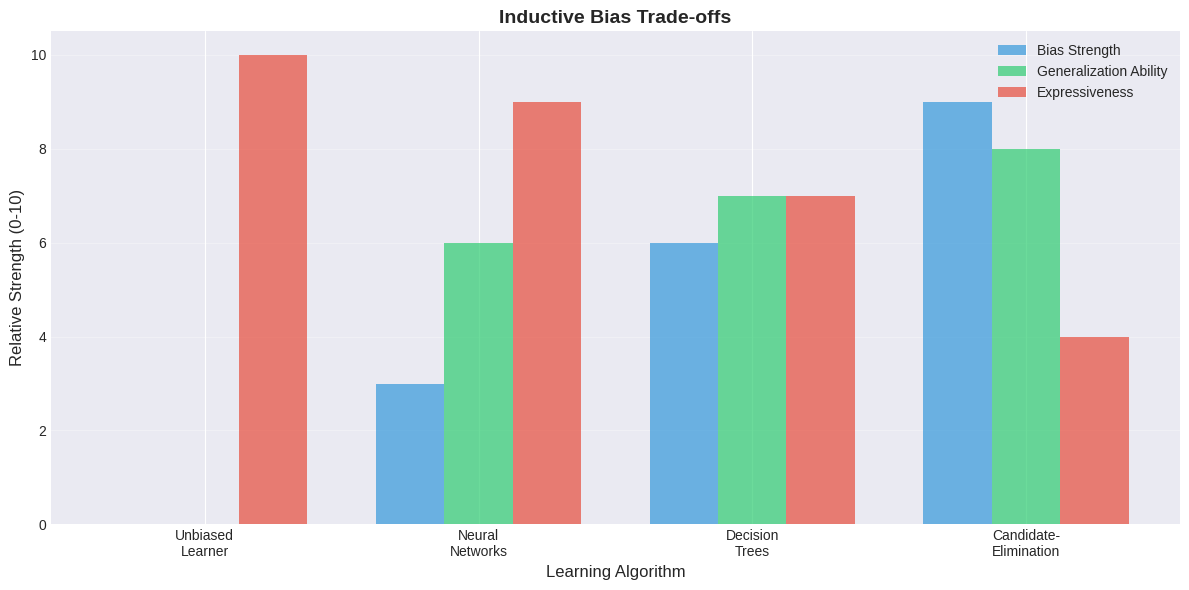


💡 Key Takeaways on Inductive Bias:
   1. All learning algorithms have inductive bias (assumptions)
   2. Bias is NECESSARY for generalization
   3. Stronger bias → better generalization (if assumptions are correct)
   4. Weaker bias → more expressive but needs more data
   5. Choose bias based on domain knowledge and data availability

⚠️  The No Free Lunch Theorem:
   No single learning algorithm is best for all problems!
   The right bias depends on the problem domain.


In [ ]:
# Demonstrate the necessity of inductive bias
print_section_header("Inductive Bias Demonstration", "🧬")

print("🤔 The Futility of Bias-Free Learning\n")

print("Scenario: Unbiased Learner with Power Set Hypothesis Space\n")
print("Given 3 training examples:")
print("  1. ⟨Sunny, Warm, Normal, Strong, Warm, Same⟩ → Yes")
print("  2. ⟨Sunny, Warm, High, Strong, Warm, Same⟩ → Yes")
print("  3. ⟨Rainy, Cold, High, Strong, Cool, Change⟩ → No\n")

print("Question: Will ⟨Sunny, Warm, Normal, Weak, Warm, Same⟩ be positive?\n")

print("With Power Set Hypothesis Space (no bias):")
print("  • Hypothesis h1: Only examples 1 and 2 are positive → Predicts: No")
print("  • Hypothesis h2: All examples with Sunny are positive → Predicts: Yes")
print("  • Hypothesis h3: All examples except 3 are positive → Predicts: Yes")
print("  • ... infinitely many hypotheses ...\n")

print("Result: Exactly HALF of consistent hypotheses say Yes, half say No!")
print("        → Cannot make a confident prediction!\n")

print("="*80)
print("With Candidate-Elimination Bias (conjunctive hypotheses):")
print("  • Restricts to hypotheses like ⟨Sunny, Warm, ?, Strong, ?, ?⟩")
print("  • Can make confident predictions on new examples")
print("  • Trade-off: Might miss concepts that aren't conjunctive\n")

# Visualize different types of bias
bias_types = [
    {
        'Algorithm': 'Candidate-Elimination',
        'Bias': 'Target is conjunctive concept',
        'Strength': 'Strong',
        'Generalization': 'Good (if assumption holds)',
        'Expressiveness': 'Limited'
    },
    {
        'Algorithm': 'Decision Trees',
        'Bias': 'Prefer shorter trees',
        'Strength': 'Medium',
        'Generalization': 'Good',
        'Expressiveness': 'High'
    },
    {
        'Algorithm': 'Neural Networks',
        'Bias': 'Smooth decision boundaries',
        'Strength': 'Weak',
        'Generalization': 'Depends on architecture',
        'Expressiveness': 'Very High'
    },
    {
        'Algorithm': 'Unbiased Learner',
        'Bias': 'None (power set)',
        'Strength': 'None',
        'Generalization': 'Impossible',
        'Expressiveness': 'Complete'
    }
]

bias_df = pd.DataFrame(bias_types)
print("\n📊 Comparison of Inductive Biases:\n")
print(bias_df.to_string(index=False))

# Visualize bias-generalization trade-off
fig, ax = plt.subplots(figsize=(12, 6))

algorithms = ['Unbiased\nLearner', 'Neural\nNetworks', 'Decision\nTrees', 'Candidate-\nElimination']
bias_strength = [0, 3, 6, 9]  # Arbitrary scale
generalization = [0, 6, 7, 8]  # Arbitrary scale
expressiveness = [10, 9, 7, 4]  # Arbitrary scale

x = np.arange(len(algorithms))
width = 0.25

ax.bar(x - width, bias_strength, width, label='Bias Strength', color='#3498db', alpha=0.7)
ax.bar(x, generalization, width, label='Generalization Ability', color='#2ecc71', alpha=0.7)
ax.bar(x + width, expressiveness, width, label='Expressiveness', color='#e74c3c', alpha=0.7)

ax.set_xlabel('Learning Algorithm', fontsize=12)
ax.set_ylabel('Relative Strength (0-10)', fontsize=12)
ax.set_title('Inductive Bias Trade-offs', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Takeaways on Inductive Bias:")
print("   1. All learning algorithms have inductive bias (assumptions)")
print("   2. Bias is NECESSARY for generalization")
print("   3. Stronger bias → better generalization (if assumptions are correct)")
print("   4. Weaker bias → more expressive but needs more data")
print("   5. Choose bias based on domain knowledge and data availability")
print("\n⚠️  The No Free Lunch Theorem:")
print("   No single learning algorithm is best for all problems!")
print("   The right bias depends on the problem domain.")

---

# Part 8: Self-Assessment and Practice

## 📝 Self-Assessment Questions

Test your understanding of the concepts covered in this module!

In [ ]:
# Interactive self-assessment
print_section_header("Self-Assessment Questions", "📝")

questions = [
    {
        'id': 1,
        'type': 'Multiple Choice',
        'question': 'Which component determines "how we measure success" in a learning problem?',
        'options': ['A) Task', 'B) Performance Measure', 'C) Experience', 'D) Hypothesis'],
        'answer': 'B',
        'explanation': 'Performance Measure (P) defines how we quantify success (e.g., accuracy %, error rate).'
    },
    {
        'id': 2,
        'type': 'Multiple Choice',
        'question': 'What is the main limitation of the Find-S algorithm?',
        'options': ['A) Too slow', 'B) Ignores negative examples', 'C) Requires too much memory', 'D) Cannot handle numeric data'],
        'answer': 'B',
        'explanation': 'Find-S only uses positive examples to generalize, ignoring negative examples entirely.'
    },
    {
        'id': 3,
        'type': 'Multiple Choice',
        'question': 'In the hypothesis ⟨Sunny, ?, ?, Strong, ?, ?⟩, what does "?" mean?',
        'options': ['A) Unknown value', 'B) Any value acceptable', 'C) No value', 'D) Error'],
        'answer': 'B',
        'explanation': '"?" means the attribute can have any value - it doesn\'t matter for classification.'
    },
    {
        'id': 4,
        'type': 'Multiple Choice',
        'question': 'What does the version space represent?',
        'options': ['A) All possible hypotheses', 'B) Only the most general hypothesis',
                   'C) All hypotheses consistent with training data', 'D) The final learned hypothesis'],
        'answer': 'C',
        'explanation': 'Version space = all hypotheses from H that are consistent with observed training examples.'
    },
    {
        'id': 5,
        'type': 'Multiple Choice',
        'question': 'Can the version space size increase as we see more training examples?',
        'options': ['A) Yes, always', 'B) Yes, sometimes', 'C) No, it can only shrink or stay same', 'D) Depends on the data'],
        'answer': 'C',
        'explanation': 'Version space is monotonically decreasing - each example eliminates hypotheses, never adds them back.'
    },
    {
        'id': 6,
        'type': 'True/False',
        'question': 'An unbiased learner (with no inductive bias) can generalize better than a biased learner.',
        'answer': 'False',
        'explanation': 'FALSE. An unbiased learner cannot generalize at all! Inductive bias is necessary for generalization.'
    },
    {
        'id': 7,
        'type': 'True/False',
        'question': 'The Candidate-Elimination algorithm uses both positive and negative examples.',
        'answer': 'True',
        'explanation': 'TRUE. Positive examples generalize S, negative examples specialize G.'
    },
    {
        'id': 8,
        'type': 'True/False',
        'question': 'The LMS algorithm is guaranteed to find the global minimum of the error function.',
        'answer': 'True',
        'explanation': 'TRUE for linear functions. The error surface is convex, so gradient descent finds the global minimum.'
    },
    {
        'id': 9,
        'type': 'Conceptual',
        'question': 'Explain why inductive bias is necessary for machine learning.',
        'answer': 'Inductive bias provides assumptions that allow a learner to generalize beyond training data. '
                 'Without bias, a learner has no basis to prefer one hypothesis over another for unseen examples, '
                 'making generalization impossible. The bias restricts the hypothesis space, enabling learning.'
    },
    {
        'id': 10,
        'type': 'Conceptual',
        'question': 'What is the difference between the S and G boundaries in version space?',
        'answer': 'S (Specific boundary) contains the most specific hypotheses consistent with training data. '
                 'G (General boundary) contains the most general hypotheses consistent with training data. '
                 'Together, they completely characterize the version space - all consistent hypotheses lie between S and G.'
    }
]

# Display questions
for q in questions:
    print(f"\nQuestion {q['id']} ({q['type']}):")
    print(f"  {q['question']}")

    if 'options' in q:
        for opt in q['options']:
            print(f"    {opt}")

    print(f"\n  ✅ Answer: {q['answer']}")

    # ✅ Only print explanation if it exists
    if 'explanation' in q:
        print(f"  💡 Explanation: {q['explanation']}")

    print("  " + "-"*70)

print("\n" + "="*80)
print("📊 How did you do? Review any concepts you found challenging!")
print("="*80)


📝 Self-Assessment Questions


Question 1 (Multiple Choice):
  Which component determines "how we measure success" in a learning problem?
    A) Task
    B) Performance Measure
    C) Experience
    D) Hypothesis

  ✅ Answer: B
  💡 Explanation: Performance Measure (P) defines how we quantify success (e.g., accuracy %, error rate).
  ----------------------------------------------------------------------

Question 2 (Multiple Choice):
  What is the main limitation of the Find-S algorithm?
    A) Too slow
    B) Ignores negative examples
    C) Requires too much memory
    D) Cannot handle numeric data

  ✅ Answer: B
  💡 Explanation: Find-S only uses positive examples to generalize, ignoring negative examples entirely.
  ----------------------------------------------------------------------

Question 3 (Multiple Choice):
  In the hypothesis ⟨Sunny, ?, ?, Strong, ?, ?⟩, what does "?" mean?
    A) Unknown value
    B) Any value acceptable
    C) No value
    D) Error

  ✅ Answer: B
  💡 Expl

---

# Part 9: Summary and Key Takeaways

## 🎯 Module Summary

Congratulations! You've completed Module 1: Introduction & Concept Learning. Let's review what we've learned.


🎯 Module 1 Summary

📚 Key Concepts Covered:

1. Well-Posed Learning Problems
   • Task (T): What we're trying to do
   • Performance (P): How we measure success
   • Experience (E): What data we learn from
   • All three must be clearly defined

2. Designing Learning Systems
   • 1. Choose training experience
   • 2. Choose target function
   • 3. Choose representation
   • 4. Choose learning algorithm

3. Concept Learning
   • Learning boolean-valued functions
   • Hypothesis = conjunction of constraints
   • General-to-specific ordering
   • Search through hypothesis space

4. Find-S Algorithm
   • Finds maximally specific hypothesis
   • Only uses positive examples
   • Starts specific, generalizes as needed
   • Limitation: Ignores negative examples

5. Candidate-Elimination
   • Maintains version space (all consistent hypotheses)
   • S boundary: Most specific hypotheses
   • G boundary: Most general hypotheses
   • Uses both positive and negative examples

6. Inductive Bias
   •

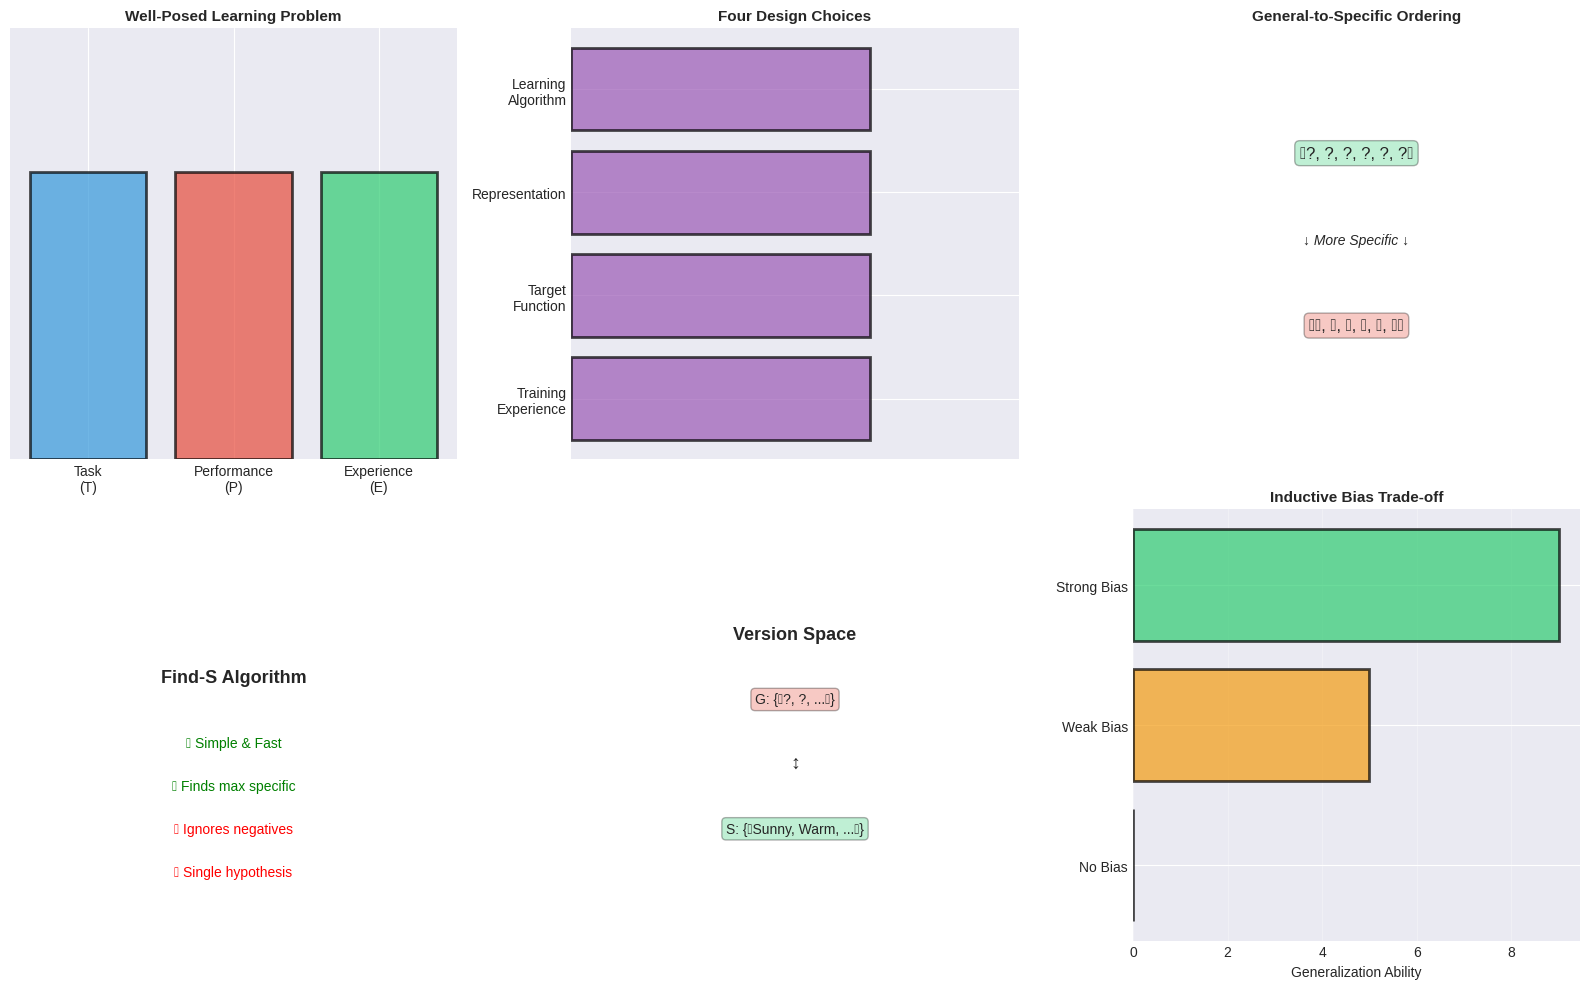


🎓 CONGRATULATIONS! You've completed Module 1!


In [ ]:
# Module 1 Summary Visualization and Printout

import matplotlib.pyplot as plt

# Print textual summary
print("="*80)
print("🎯 Module 1 Summary")
print("="*80)
print("\n📚 Key Concepts Covered:\n")

concepts = [
    {
        'Topic': 'Well-Posed Learning Problems',
        'Key Points': [
            "Task (T): What we're trying to do",
            "Performance (P): How we measure success",
            "Experience (E): What data we learn from",
            "All three must be clearly defined"
        ]
    },
    {
        'Topic': 'Designing Learning Systems',
        'Key Points': [
            "1. Choose training experience",
            "2. Choose target function",
            "3. Choose representation",
            "4. Choose learning algorithm"
        ]
    },
    {
        'Topic': 'Concept Learning',
        'Key Points': [
            "Learning boolean-valued functions",
            "Hypothesis = conjunction of constraints",
            "General-to-specific ordering",
            "Search through hypothesis space"
        ]
    },
    {
        'Topic': 'Find-S Algorithm',
        'Key Points': [
            "Finds maximally specific hypothesis",
            "Only uses positive examples",
            "Starts specific, generalizes as needed",
            "Limitation: Ignores negative examples"
        ]
    },
    {
        'Topic': 'Candidate-Elimination',
        'Key Points': [
            "Maintains version space (all consistent hypotheses)",
            "S boundary: Most specific hypotheses",
            "G boundary: Most general hypotheses",
            "Uses both positive and negative examples"
        ]
    },
    {
        'Topic': 'Inductive Bias',
        'Key Points': [
            "Assumptions needed for generalization",
            "No bias = no generalization",
            "Stronger bias = better generalization (if correct)",
            "Trade-off: bias vs expressiveness"
        ]
    }
]

# Print all concepts
for i, concept in enumerate(concepts, 1):
    print(f"{i}. {concept['Topic']}")
    for point in concept['Key Points']:
        print(f"   • {point}")
    print()

# Create visual summary
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# 1. Well-Posed Problems
ax = axes[0]
components = ['Task\n(T)', 'Performance\n(P)', 'Experience\n(E)']
values = [1, 1, 1]
colors_comp = ['#3498db', '#e74c3c', '#2ecc71']
ax.bar(components, values, color=colors_comp, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_title('Well-Posed Learning Problem', fontweight='bold', fontsize=11)
ax.set_ylim(0, 1.5)
ax.set_yticks([])

# 2. Design Choices
ax = axes[1]
choices = ['Training\nExperience', 'Target\nFunction', 'Representation', 'Learning\nAlgorithm']
ax.barh(choices, [1]*4, color='#9b59b6', alpha=0.7, edgecolor='black', linewidth=2)
ax.set_title('Four Design Choices', fontweight='bold', fontsize=11)
ax.set_xlim(0, 1.5)
ax.set_xticks([])

# 3. Hypothesis Space
ax = axes[2]
ax.text(0.5, 0.7, '⟨?, ?, ?, ?, ?, ?⟩', ha='center', fontsize=12,
           bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.3))
ax.text(0.5, 0.5, '↓ More Specific ↓', ha='center', fontsize=10, style='italic')
ax.text(0.5, 0.3, '⟨∅, ∅, ∅, ∅, ∅, ∅⟩', ha='center', fontsize=12,
           bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.3))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('General-to-Specific Ordering', fontweight='bold', fontsize=11)

# 4. Find-S
ax = axes[3]
ax.text(0.5, 0.6, 'Find-S Algorithm', ha='center', fontsize=13, fontweight='bold')
ax.text(0.5, 0.45, '✓ Simple & Fast', ha='center', fontsize=10, color='green')
ax.text(0.5, 0.35, '✓ Finds max specific', ha='center', fontsize=10, color='green')
ax.text(0.5, 0.25, '✗ Ignores negatives', ha='center', fontsize=10, color='red')
ax.text(0.5, 0.15, '✗ Single hypothesis', ha='center', fontsize=10, color='red')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# 5. Candidate-Elimination
ax = axes[4]
ax.text(0.5, 0.7, 'Version Space', ha='center', fontsize=13, fontweight='bold')
ax.text(0.5, 0.55, 'G: {⟨?, ?, ...⟩}', ha='center', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.3))
ax.text(0.5, 0.4, '↕', ha='center', fontsize=14)
ax.text(0.5, 0.25, 'S: {⟨Sunny, Warm, ...⟩}', ha='center', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.3))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# 6. Inductive Bias
ax = axes[5]
bias_levels = ['No Bias', 'Weak Bias', 'Strong Bias']
generalization = [0, 5, 9]
colors_bias = ['#e74c3c', '#f39c12', '#2ecc71']
ax.barh(bias_levels, generalization, color=colors_bias, alpha=0.7, edgecolor='black', linewidth=2)
ax.set_xlabel('Generalization Ability', fontsize=10)
ax.set_title('Inductive Bias Trade-off', fontweight='bold', fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🎓 CONGRATULATIONS! You've completed Module 1!")
print("="*80)

## 💼 Real-World Applications

### Where These Concepts Are Used Today

1. **Email Spam Filtering**
   - Gmail, Outlook use concept learning principles
   - Learns patterns from labeled spam/not-spam examples
   - Continuously updates as new spam tactics emerge

2. **Medical Diagnosis Systems**
   - Learn disease patterns from symptoms
   - Version spaces help identify when more tests are needed
   - Inductive bias based on medical knowledge

3. **Fraud Detection**
   - Credit card companies detect fraudulent transactions
   - Learn from historical fraud patterns
   - Balance false positives vs false negatives

4. **Recommendation Systems**
   - Netflix, Amazon learn user preferences
   - Generalize from past behavior to new items
   - Bias: Users with similar history have similar preferences

5. **Quality Control in Manufacturing**
   - Learn defect patterns from inspection data
   - Automated visual inspection systems
   - Reduce human error and inspection time

## 📚 Additional Resources

### Recommended Reading

1. **Tom Mitchell - Machine Learning (Chapter 1-2)**
   - The definitive textbook on concept learning
   - Detailed mathematical proofs and analysis

2. **Research Papers**
   - Mitchell, T. (1982). "Generalization as Search" - Original version space paper
   - Haussler, D. (1988). "Quantifying Inductive Bias" - Theoretical foundations

3. **Online Resources**
   - Coursera: Machine Learning by Andrew Ng
   - MIT OpenCourseWare: Introduction to Machine Learning
   - Scikit-learn documentation and tutorials

### Practice Exercises

1. **Implement Find-S for a new domain**
   - Choose a different concept (e.g., "good movies to watch")
   - Define attributes and collect training data
   - Run Find-S and analyze results

2. **Extend Candidate-Elimination**
   - Add noise handling (contradictory examples)
   - Implement confidence scoring for predictions
   - Visualize the version space graphically

3. **Compare Different Biases**
   - Implement a disjunctive concept learner
   - Compare with conjunctive (Candidate-Elimination)
   - Analyze which works better for different problems

### Next Steps

**Module 2: Decision Tree Learning**
- Learn how to build decision trees
- Understand entropy and information gain
- Handle overfitting with pruning
- Apply to real-world classification problems

**Prepare by:**
- Reviewing probability basics (conditional probability)
- Understanding entropy and information theory
- Practicing with tree-structured data

## 🎯 Final Reflection

### Discussion Questions

1. **Conceptual Understanding**
   - Why is it impossible to learn without inductive bias?
   - How would you explain version spaces to a non-technical person?
   - What are the trade-offs between Find-S and Candidate-Elimination?

2. **Practical Application**
   - Think of a problem in your domain that could use concept learning
   - What would be the attributes? The target concept?
   - What inductive bias would be appropriate?

3. **Critical Thinking**
   - When would Candidate-Elimination fail or perform poorly?
   - How could you modify these algorithms for continuous-valued attributes?
   - What happens if the target concept is not in the hypothesis space?

4. **Future Exploration**
   - How do modern ML algorithms (neural networks) relate to these concepts?
   - What role does inductive bias play in deep learning?
   - How can we automatically learn the right bias for a problem?

---

## 🙏 Thank You!

Thank you for completing Module 1! You now have a solid foundation in:
- Defining well-posed learning problems
- Designing learning systems
- Understanding concept learning algorithms
- Appreciating the role of inductive bias

These fundamentals will serve you well as you progress through more advanced machine learning topics.

**Keep Learning! Keep Building! Keep Innovating!** 🚀

---

*Arivu AI Machine Learning Course - Module 1*  
*Created with ❤️ for aspiring ML practitioners*